# Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-
Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.
Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [2]:
#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

In [28]:
dset = pd.read_excel("OLX v4 data.xlsx")

# eda

In [29]:
df = dset #dset is kept unmodified for later use

In [30]:
df.head(10)

,Unnamed: 0,Make,Model,Year,Owner,Transmission,Fuel,Kms,Location,Price
0,0,Bmw 7 Series,740Li Sedan,2011,2nd,AUTOMATIC,PETROL,64000.0,Maharashtra,"17,50,000"
1,1,Maruti Suzuki Swift,ZXI,2010,1st,MANUAL,PETROL,115094.0,Maharashtra,"3,25,000"
2,2,Volkswagen Passat,2010-2014 Diesel Comfortline 2.0 TDI,2012,1st,MANUAL,DIESEL,53000.0,Maharashtra,"5,75,000"
3,3,Chevrolet Aveo,1.4 LT,2008,2nd,MANUAL,PETROL,42000.0,Maharashtra,"1,40,000"
4,4,Maruti Suzuki Swift,VDI,2019,1st,MANUAL,DIESEL,13500.0,Maharashtra,"7,49,000"
5,5,Maruti Suzuki Swift,2011-2014 VXI,2015,1st,MANUAL,PETROL,45000.0,Maharashtra,"4,51,000"
6,6,Maruti Suzuki Ciaz,1.3 Zeta,2017,1st,MANUAL,DIESEL,44000.0,Maharashtra,"7,51,000"
7,7,Mercedes-Benz S-Class,S 300 L,2013,1st,AUTOMATIC,PETROL,62000.0,Maharashtra,"21,00,000"
8,8,Hyundai I10,1.1L iRDE ERA Special Edition,2012,1st,MANUAL,PETROL,49383.0,Maharashtra,"2,55,000"
9,9,Maruti Suzuki Wagon R 1.0,1.0 VXi,2013,1st,MANUAL,PETROL,51000.0,Maharashtra,"3,25,000"


In [31]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [32]:
df.shape # check the data dimension

(8062, 9)

In [33]:
df.columns

Index(['Make', 'Model', 'Year', 'Owner', 'Transmission', 'Fuel', 'Kms',
       'Location', 'Price'],
      dtype='object')

In [34]:
df.dtypes

Make            object
Model           object
Year             int64
Owner           object
Transmission    object
Fuel            object
Kms             object
Location        object
Price           object
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          8062 non-null   object
 1   Model         8062 non-null   object
 2   Year          8062 non-null   int64 
 3   Owner         8062 non-null   object
 4   Transmission  8062 non-null   object
 5   Fuel          8062 non-null   object
 6   Kms           8062 non-null   object
 7   Location      8062 non-null   object
 8   Price         8062 non-null   object
dtypes: int64(1), object(8)
memory usage: 567.0+ KB


In [36]:
df.describe()

,Year
count,8062.000000
mean,2012.797817
std,4.914332
min,1900.000000
25%,2010.000000
50%,2013.000000
75%,2016.000000
max,2021.000000


In [37]:
df.isna().sum()

Make            0
Model           0
Year            0
Owner           0
Transmission    0
Fuel            0
Kms             0
Location        0
Price           0
dtype: int64

Price, Kms and Owner columns should be integers

In [38]:
for i in range(0, len(df)):
    df["Price"][i] = df["Price"][i].replace(",", "")
    df["Kms"][i] = df["Kms"][i].replace(",", "")
    df["Owner"][i] = df["Owner"][i][0]

In [41]:
df["Price"] = df["Price"].astype(int)

In [46]:
drop_list = []
for i in range(0, len(df["Kms"])):
    if df["Kms"][i].isalpha():
        drop_list.append(i)

In [48]:
for i in range(0, len(df["Owner"])):
    if df["Owner"][i].isalpha():
        drop_list.append(i)

In [49]:
df.drop(index= drop_list, axis= 0, inplace= True)

In [68]:
df["Owner"] = df["Owner"].astype(int)
df["Kms"] = df["Kms"].astype(float)

In [50]:
#drop columns with 1 value only and all unique values since they will not have any impact on the model

In [59]:
df.columns

Index(['Make', 'Model', 'Year', 'Owner', 'Transmission', 'Fuel', 'Kms',
       'Location', 'Price'],
      dtype='object')

In [60]:
columns = ['Make', 'Model', 'Year', 'Owner', 'Transmission', 'Fuel', 'Kms', 'Location', 'Price']

In [54]:
[col for col in df if df[col].nunique() == 2]

['Transmission']

In [55]:
[col for col in df if df[col].nunique() == 4]

['Owner']

In [58]:
[col for col in df if df[col].nunique() == 5]

['Fuel']

In [69]:
df["Owner"] = df["Owner"].astype(int)
df["Kms"] = df["Kms"].astype(float)

In [70]:
int_cols = df.select_dtypes(exclude=['object']).columns
obj_cols = df.select_dtypes(include=['object']).columns

In [74]:
int_cols

Index(['Year', 'Owner', 'Kms', 'Price'], dtype='object')

In [77]:
for i in range(0, len(df["Kms"])):
    try:
        if df["Kms"][i].isalpha():
            print(i)
    except:
        pass

In [21]:
len(int_cols) + len(obj_cols) #checking total number of variables

74

Year


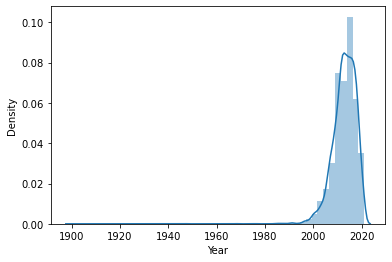

Owner


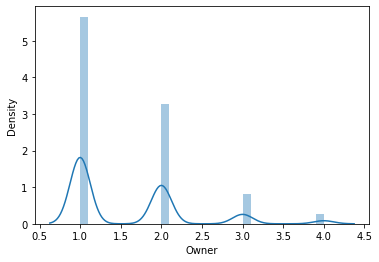

Kms


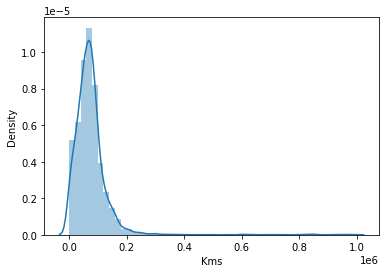

Price


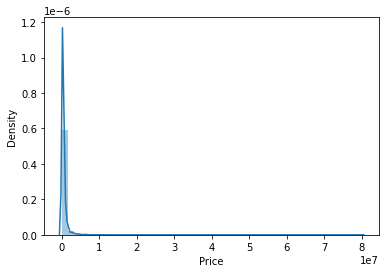

In [78]:
for col in int_cols:
    print(col)
    
    plt.figure()
    sns.distplot(df[col], kde = True)
    plt.show()

Make


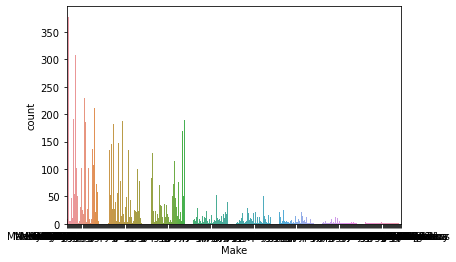

Model


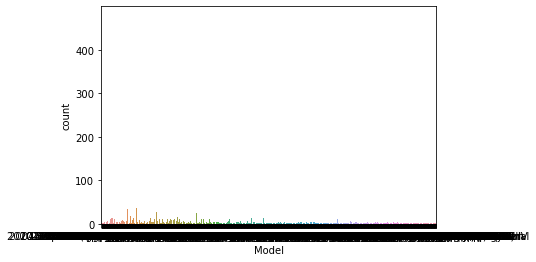

Transmission


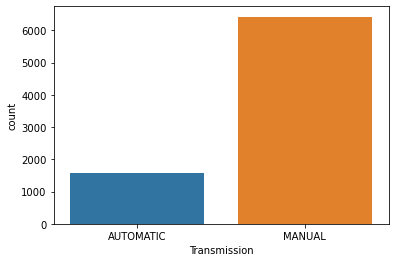

Fuel


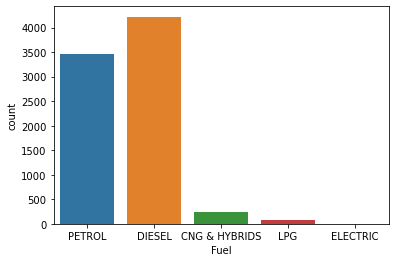

Location


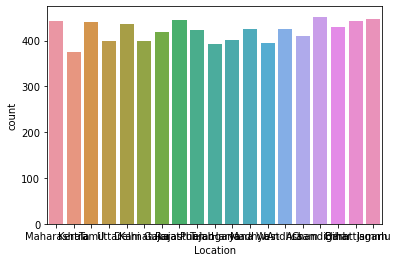

In [79]:
for cols in obj_cols:
    print(cols)
    
    plt.figure()
    sns.countplot(df[cols])
    plt.show()

Year vs Price


<Figure size 432x288 with 0 Axes>

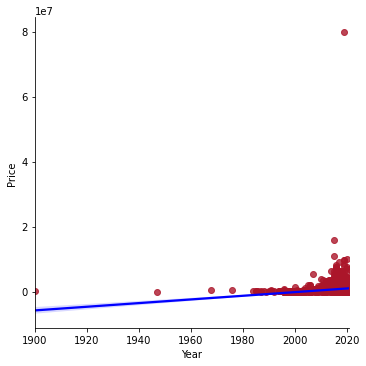

Owner vs Price


<Figure size 432x288 with 0 Axes>

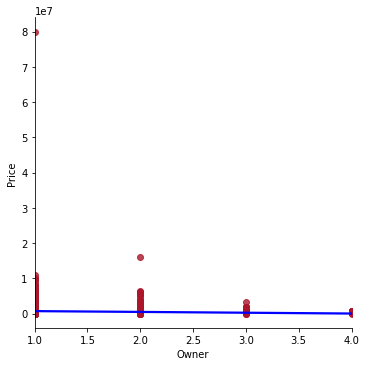

Kms vs Price


<Figure size 432x288 with 0 Axes>

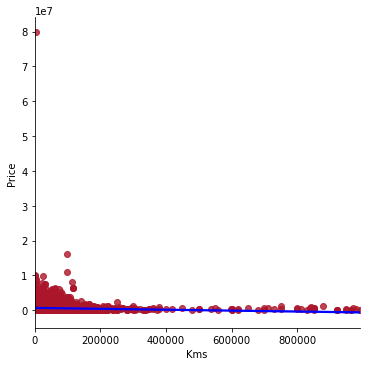

In [80]:
sns.set_palette("RdBu", 10)
for cols in int_cols:
    if cols != "Price":
        print('{} vs Price'.format(cols))
    
        plt.figure()
        sns.lmplot(x = cols, y = 'Price', data = df, line_kws={'color':'blue'})
        plt.show()

Make vs Price


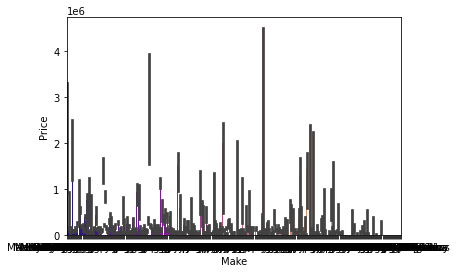

Model vs Price


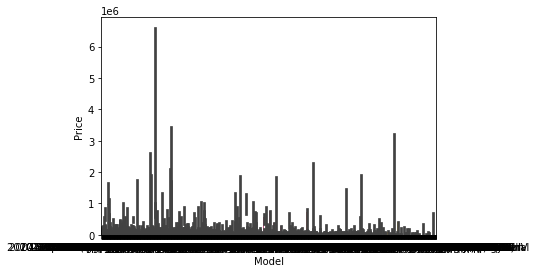

Transmission vs Price


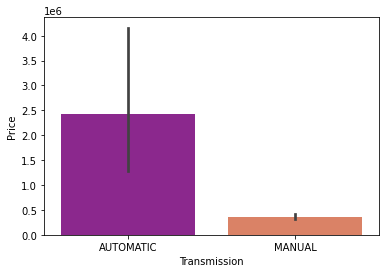

Fuel vs Price


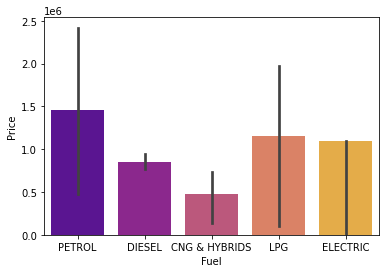

Location vs Price


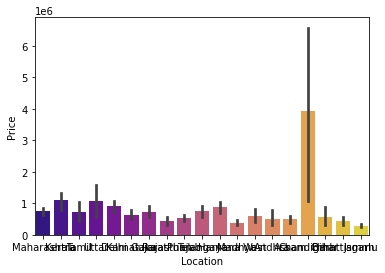

In [81]:
obj_cols1 = dset.select_dtypes(include=['object']).columns
for cols in obj_cols1:
    print('{} vs Price'.format(cols))
    
    plt.figure()
    sns.barplot(x =cols, y ='Price', data = dset,palette ='plasma', estimator = np.std)    
    plt.show()

In [87]:
df_obj = df[obj_cols]
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_obj = df_obj.apply(LabelEncoder().fit_transform)

In [88]:
df_obj

,Make,Model,Transmission,Fuel,Location
0,18,1164,0,4,12
1,183,2049,1,4,12
2,316,769,1,1,12
3,24,169,1,4,12
4,183,1891,1,1,12
...,...,...,...,...,...
8057,112,1040,1,1,8
8058,186,598,1,4,8
8059,237,207,0,4,8
8060,104,1994,1,4,8


In [89]:
#Handling missing values in integer type variables

In [90]:
df_int = df[int_cols]

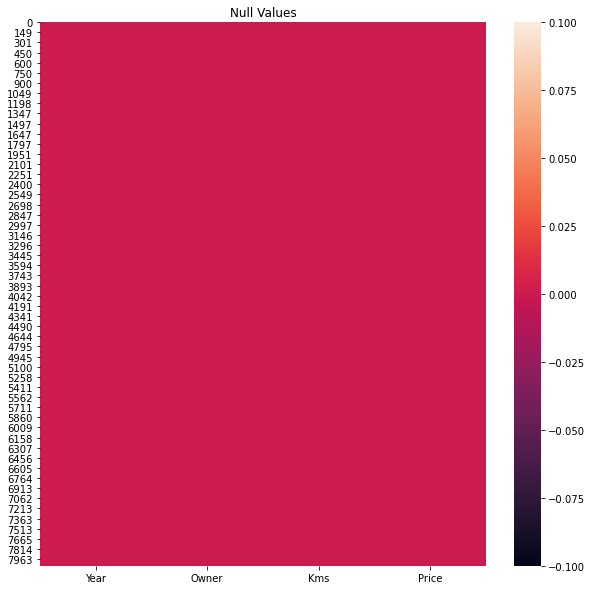

In [86]:
plt.figure(figsize = (10,10))
sns.heatmap(df_int.isnull())
plt.title("Null Values")
plt.show()

In [91]:
df = df_int.join(df_obj)

In [92]:
df

,Year,Owner,Kms,Price,Make,Model,Transmission,Fuel,Location
0,2011,2,64000.0,1750000,18,1164,0,4,12
1,2010,1,115094.0,325000,183,2049,1,4,12
2,2012,1,53000.0,575000,316,769,1,1,12
3,2008,2,42000.0,140000,24,169,1,4,12
4,2019,1,13500.0,749000,183,1891,1,1,12
...,...,...,...,...,...,...,...,...,...
8057,2016,2,96000.0,360000,112,1040,1,1,8
8058,2010,2,67000.0,250000,186,598,1,4,8
8059,2014,2,41000.0,480000,237,207,0,4,8
8060,2013,1,117000.0,230000,104,1994,1,4,8


## check for outliers

In [45]:
#remove outliers before skewness check and before x, y split

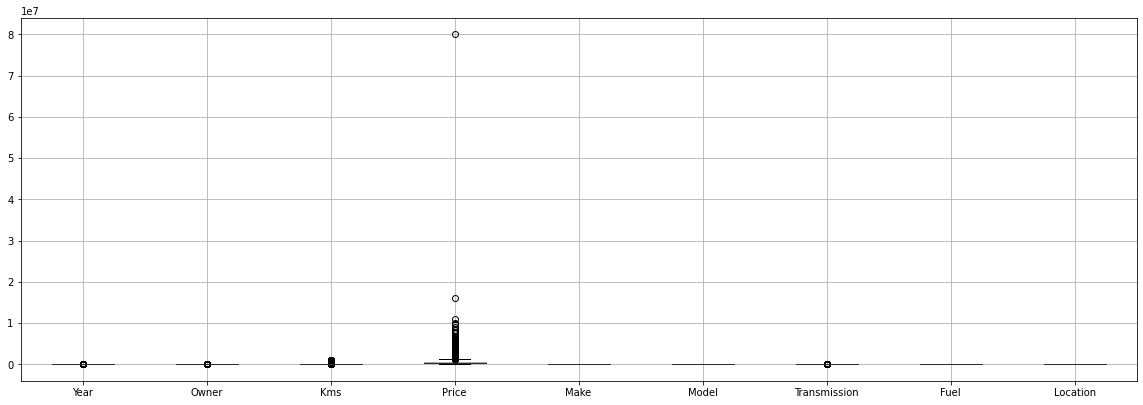

In [93]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [94]:
#Removing outliers by z score

In [95]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [96]:
dataloss = ((df.shape[0]-new_df.shape[0])/df.shape[0])*100
dataloss

5.0775387693846925

In [97]:
df = new_df

In [98]:
#Data loss is low, hence dropping outliers

## check co-relation

In [99]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [100]:
df.columns

Index(['Year', 'Owner', 'Kms', 'Price', 'Make', 'Model', 'Transmission',
       'Fuel', 'Location'],
      dtype='object')

In [104]:
df_cor = df.corr()
df_cor["Price"].sort_values(ascending=False)

Price           1.000000
Year            0.451966
Make           -0.010176
Location       -0.011013
Model          -0.033803
Kms            -0.141049
Owner          -0.249585
Fuel           -0.250441
Transmission   -0.351418
Name: Price, dtype: float64

## check for skewness

In [112]:
x = df.drop('Price',axis=1)
y = df['Price']

Year
-0.5576244703099452


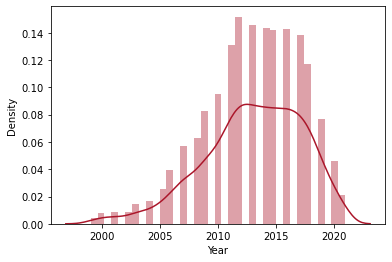

Owner
0.9260189450365546


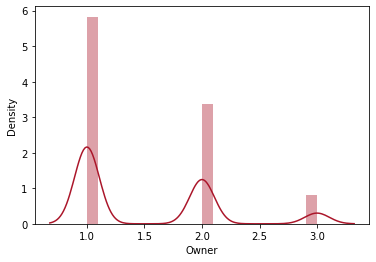

Kms
0.9906718044212215


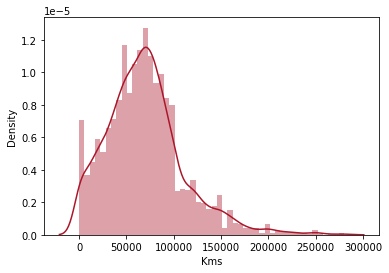

Make
0.2766524083063858


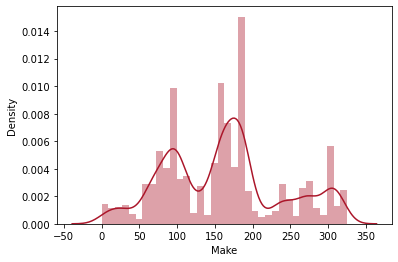

Model
-0.3267817144207144


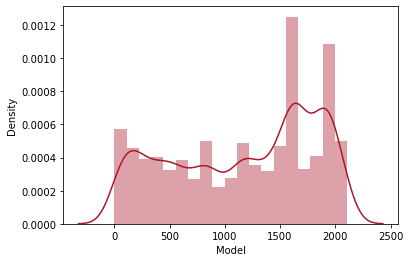

Transmission
-1.5805286157838188


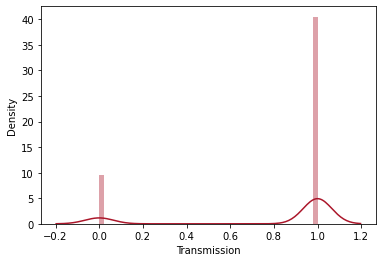

Fuel
0.20638299252666176


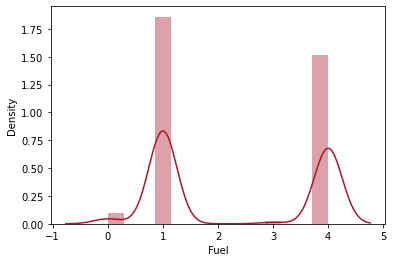

Location
0.01504791258389269


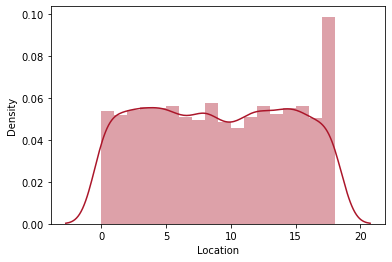

In [113]:
for col in x:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [114]:
x.skew() # check skewness

Year           -0.557735
Owner           0.926202
Kms             0.990868
Make            0.276707
Model          -0.326846
Transmission   -1.580841
Fuel            0.206424
Location        0.015051
dtype: float64

In [115]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [116]:
df_new.skew()

Year           -0.310973
Owner           0.397773
Kms            -0.167826
Make           -0.077595
Model          -0.446031
Transmission   -1.580841
Fuel            0.004172
Location       -0.230283
dtype: float64

In [117]:
#changing skewness is not required

## finding the best random state

In [118]:
from sklearn.metrics import r2_score

In [119]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = r2_score(y_test, predLR)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.4003181765023426  on Random State  71


## test train split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=71)

## regression

In [121]:
#Linear Regression

MAE: 253056.80453330788
MSE: 171372701444.87872
RMSE: 413971.86069209914
Variance: 0.401204239616873
R2 Score: 0.4003181765023426


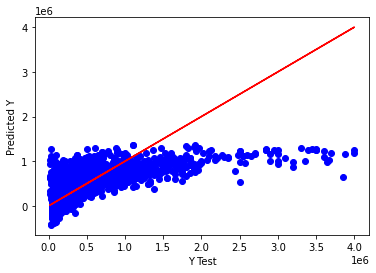

In [122]:
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
acc = r2_score(y_test, predLR)
acc
plt.scatter(y_test,predLR,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
print('Variance:', metrics.explained_variance_score(y_test, predLR))
print('R2 Score:', r2_score(y_test, predLR))

## Regularization

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [124]:
from sklearn.linear_model import Lasso

parameters = {'alpha': [.0001, .001, .01, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [126]:
ls = Lasso(alpha=10, random_state= 0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.40031200381605025

In [127]:
#Lasso Regression does not improve the R2 score

In [128]:
#CatBoostRegressor

0:	learn: 453383.2675356	total: 169ms	remaining: 1.52s
1:	learn: 422752.0212794	total: 170ms	remaining: 682ms
2:	learn: 404991.3033736	total: 172ms	remaining: 401ms
3:	learn: 387764.6069175	total: 174ms	remaining: 260ms
4:	learn: 379568.5877938	total: 175ms	remaining: 175ms
5:	learn: 375164.0629265	total: 177ms	remaining: 118ms
6:	learn: 369116.4728960	total: 179ms	remaining: 76.5ms
7:	learn: 366027.7366116	total: 180ms	remaining: 45ms
8:	learn: 364505.4819710	total: 181ms	remaining: 20.1ms
9:	learn: 359635.9009932	total: 182ms	remaining: 0us
MAE: 210869.5061780453
MSE: 136830191020.14664
RMSE: 369905.65151149913
R2 Score 0.5211922449218855
Variance: 0.5215430425619617


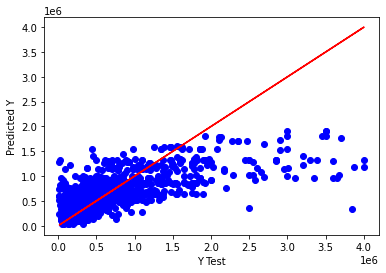

In [129]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score', r2_score(y_test, preds))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [70]:
#decisiontreeregressor

MAE: 214460.25146968695
MSE: 147553236112.2204
RMSE: 384126.5886556415
Variance: 0.4837886863764821
R2 Score: 0.48366926033889046


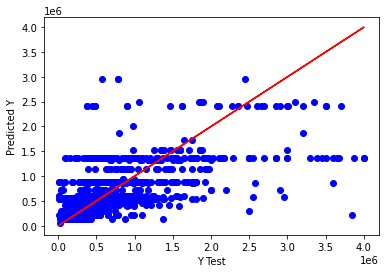

In [130]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

## hyper parameter tuning

In [131]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()

gs1 = GridSearchCV(model,
                  param_grid = {'depth'         : [6,8,10],
                                'learning_rate' : [0.01, 0.05, 0.1],
                                'iterations'    : [30, 50, 100]},
                  cv=5,
                  n_jobs=1)

gs1.fit(x_train, y_train)

print(gs1.best_estimator_)
print(gs1.best_params_)
print(gs1.best_score_)

0:	learn: 506963.7908374	total: 2.75ms	remaining: 79.9ms
1:	learn: 504677.4231721	total: 5.43ms	remaining: 76ms
2:	learn: 502284.5598200	total: 8.21ms	remaining: 73.9ms
3:	learn: 500095.4678645	total: 10.6ms	remaining: 68.7ms
4:	learn: 497903.7544204	total: 13.4ms	remaining: 66.9ms
5:	learn: 495687.0100009	total: 15.8ms	remaining: 63.2ms
6:	learn: 493611.8761046	total: 18.1ms	remaining: 59.6ms
7:	learn: 491484.2731002	total: 20.8ms	remaining: 57.1ms
8:	learn: 489579.6941945	total: 23.5ms	remaining: 54.8ms
9:	learn: 487433.7110996	total: 25.9ms	remaining: 51.9ms
10:	learn: 485298.3805596	total: 28.4ms	remaining: 49.1ms
11:	learn: 483316.5502674	total: 30.9ms	remaining: 46.3ms
12:	learn: 481409.2172963	total: 33.6ms	remaining: 44ms
13:	learn: 479314.0190406	total: 36.5ms	remaining: 41.7ms
14:	learn: 477482.4109432	total: 39.4ms	remaining: 39.4ms
15:	learn: 475621.9178408	total: 41.9ms	remaining: 36.7ms
16:	learn: 473944.2379001	total: 44ms	remaining: 33.7ms
17:	learn: 472108.6787739	tota

1:	learn: 491158.6347671	total: 6.17ms	remaining: 86.4ms
2:	learn: 480989.3555328	total: 8.37ms	remaining: 75.3ms
3:	learn: 472683.1639485	total: 10.8ms	remaining: 70ms
4:	learn: 464471.4340126	total: 13.2ms	remaining: 65.9ms
5:	learn: 456091.7663684	total: 16ms	remaining: 64.1ms
6:	learn: 449152.3141956	total: 18.5ms	remaining: 60.7ms
7:	learn: 441856.0020284	total: 21ms	remaining: 57.7ms
8:	learn: 435166.0514771	total: 23.4ms	remaining: 54.6ms
9:	learn: 428871.8071569	total: 26.6ms	remaining: 53.3ms
10:	learn: 422929.0844368	total: 32ms	remaining: 55.2ms
11:	learn: 416257.1196683	total: 35.2ms	remaining: 52.7ms
12:	learn: 411571.1457795	total: 38.6ms	remaining: 50.4ms
13:	learn: 406333.7040540	total: 41.6ms	remaining: 47.5ms
14:	learn: 401172.0319753	total: 45.9ms	remaining: 45.9ms
15:	learn: 396703.0732034	total: 49ms	remaining: 42.9ms
16:	learn: 393181.8677205	total: 51.1ms	remaining: 39.1ms
17:	learn: 389245.5890464	total: 53.8ms	remaining: 35.9ms
18:	learn: 385662.8874696	total: 

1:	learn: 471800.5701867	total: 9.12ms	remaining: 128ms
2:	learn: 454449.2645142	total: 13ms	remaining: 117ms
3:	learn: 440685.7010931	total: 15.9ms	remaining: 104ms
4:	learn: 426520.2078493	total: 18.5ms	remaining: 92.7ms
5:	learn: 415081.7702430	total: 20.8ms	remaining: 83.4ms
6:	learn: 405132.1212999	total: 23.8ms	remaining: 78ms
7:	learn: 395799.2086394	total: 26ms	remaining: 71.5ms
8:	learn: 386957.9067283	total: 28.4ms	remaining: 66.4ms
9:	learn: 380192.6849209	total: 31.2ms	remaining: 62.5ms
10:	learn: 373418.2311934	total: 34.4ms	remaining: 59.5ms
11:	learn: 367949.7064001	total: 37.1ms	remaining: 55.7ms
12:	learn: 363482.8666451	total: 40ms	remaining: 52.3ms
13:	learn: 357884.6182509	total: 42.3ms	remaining: 48.3ms
14:	learn: 351467.1325706	total: 44.8ms	remaining: 44.8ms
15:	learn: 347157.0793480	total: 48.1ms	remaining: 42.1ms
16:	learn: 342615.7825726	total: 51.8ms	remaining: 39.6ms
17:	learn: 339491.6207010	total: 54.2ms	remaining: 36.1ms
18:	learn: 333965.6919465	total: 5

13:	learn: 484515.2175688	total: 32.8ms	remaining: 84.4ms
14:	learn: 482776.2733810	total: 36.2ms	remaining: 84.5ms
15:	learn: 480951.8465738	total: 38.5ms	remaining: 81.8ms
16:	learn: 479360.9607065	total: 40.3ms	remaining: 78.3ms
17:	learn: 477546.1486240	total: 43ms	remaining: 76.5ms
18:	learn: 475905.2575099	total: 45.3ms	remaining: 74ms
19:	learn: 474218.1227105	total: 47.9ms	remaining: 71.8ms
20:	learn: 472583.2475237	total: 50.4ms	remaining: 69.6ms
21:	learn: 470864.8249070	total: 52.9ms	remaining: 67.3ms
22:	learn: 469158.1606864	total: 55.2ms	remaining: 64.8ms
23:	learn: 467455.2046613	total: 57.6ms	remaining: 62.4ms
24:	learn: 465862.3015838	total: 60.2ms	remaining: 60.2ms
25:	learn: 464282.9059168	total: 64.2ms	remaining: 59.3ms
26:	learn: 462787.1715710	total: 67.1ms	remaining: 57.1ms
27:	learn: 461118.2734479	total: 69.5ms	remaining: 54.6ms
28:	learn: 459486.9033572	total: 71.8ms	remaining: 52ms
29:	learn: 458048.1369704	total: 74ms	remaining: 49.3ms
30:	learn: 456624.8899

19:	learn: 462592.1999014	total: 50.1ms	remaining: 75.2ms
20:	learn: 460926.6979164	total: 52.5ms	remaining: 72.6ms
21:	learn: 459162.1612901	total: 55.2ms	remaining: 70.3ms
22:	learn: 457316.4974926	total: 57.9ms	remaining: 68ms
23:	learn: 455628.5516142	total: 60.4ms	remaining: 65.4ms
24:	learn: 454036.1694005	total: 62.8ms	remaining: 62.8ms
25:	learn: 452409.0924389	total: 65.1ms	remaining: 60.1ms
26:	learn: 450522.1733057	total: 68.1ms	remaining: 58ms
27:	learn: 448976.1267493	total: 71ms	remaining: 55.8ms
28:	learn: 447291.7886416	total: 73.8ms	remaining: 53.5ms
29:	learn: 445711.2511636	total: 76.5ms	remaining: 51ms
30:	learn: 444116.3016608	total: 78.8ms	remaining: 48.3ms
31:	learn: 442507.3351834	total: 81.1ms	remaining: 45.6ms
32:	learn: 440988.1795990	total: 84ms	remaining: 43.3ms
33:	learn: 439523.4299488	total: 87.5ms	remaining: 41.2ms
34:	learn: 437966.0132832	total: 90ms	remaining: 38.6ms
35:	learn: 436563.8659381	total: 92.3ms	remaining: 35.9ms
36:	learn: 435146.1443225	

11:	learn: 408320.1519652	total: 30.6ms	remaining: 97ms
12:	learn: 403070.3600648	total: 32.9ms	remaining: 93.7ms
13:	learn: 398040.4929119	total: 35.3ms	remaining: 90.7ms
14:	learn: 392882.3329031	total: 39.3ms	remaining: 91.6ms
15:	learn: 388899.5205430	total: 41.7ms	remaining: 88.5ms
16:	learn: 385614.2370528	total: 43.5ms	remaining: 84.5ms
17:	learn: 381850.9517091	total: 45.9ms	remaining: 81.6ms
18:	learn: 378057.7747483	total: 48.3ms	remaining: 78.8ms
19:	learn: 373595.2833657	total: 52.2ms	remaining: 78.3ms
20:	learn: 369099.8079487	total: 54.5ms	remaining: 75.3ms
21:	learn: 365996.3638086	total: 57ms	remaining: 72.6ms
22:	learn: 363110.3770448	total: 59.4ms	remaining: 69.7ms
23:	learn: 360176.9973487	total: 61.7ms	remaining: 66.8ms
24:	learn: 357478.0092805	total: 65.8ms	remaining: 65.8ms
25:	learn: 354456.7985915	total: 68.2ms	remaining: 63ms
26:	learn: 351433.4155262	total: 70.7ms	remaining: 60.2ms
27:	learn: 349059.1017500	total: 73.3ms	remaining: 57.6ms
28:	learn: 346958.68

41:	learn: 280697.8859301	total: 172ms	remaining: 32.7ms
42:	learn: 278062.6214836	total: 176ms	remaining: 28.6ms
43:	learn: 276013.9387589	total: 179ms	remaining: 24.4ms
44:	learn: 274698.7742235	total: 182ms	remaining: 20.2ms
45:	learn: 274278.7241193	total: 185ms	remaining: 16.1ms
46:	learn: 273167.7610366	total: 189ms	remaining: 12.1ms
47:	learn: 272629.9683636	total: 192ms	remaining: 8.01ms
48:	learn: 271880.1791495	total: 196ms	remaining: 3.99ms
49:	learn: 271136.9244305	total: 200ms	remaining: 0us
0:	learn: 493451.6541841	total: 3.77ms	remaining: 185ms
1:	learn: 473281.2092205	total: 10.3ms	remaining: 248ms
2:	learn: 458053.8196096	total: 13.4ms	remaining: 209ms
3:	learn: 443489.8683381	total: 16.8ms	remaining: 193ms
4:	learn: 431424.4700340	total: 21.2ms	remaining: 191ms
5:	learn: 415769.3519473	total: 25.6ms	remaining: 188ms
6:	learn: 405436.0554807	total: 29.7ms	remaining: 183ms
7:	learn: 395749.8625524	total: 35.8ms	remaining: 188ms
8:	learn: 388307.6350105	total: 39ms	remai

9:	learn: 487433.7110996	total: 26.9ms	remaining: 242ms
10:	learn: 485298.3805596	total: 30.7ms	remaining: 248ms
11:	learn: 483316.5502674	total: 33.3ms	remaining: 244ms
12:	learn: 481409.2172963	total: 35.6ms	remaining: 238ms
13:	learn: 479314.0190406	total: 38ms	remaining: 234ms
14:	learn: 477482.4109432	total: 40.5ms	remaining: 229ms
15:	learn: 475621.9178408	total: 44.4ms	remaining: 233ms
16:	learn: 473944.2379001	total: 46.9ms	remaining: 229ms
17:	learn: 472108.6787739	total: 50.4ms	remaining: 230ms
18:	learn: 470479.2539134	total: 53.4ms	remaining: 228ms
19:	learn: 468688.4000375	total: 60.4ms	remaining: 241ms
20:	learn: 466962.5848563	total: 62.9ms	remaining: 237ms
21:	learn: 465403.8395278	total: 65.3ms	remaining: 232ms
22:	learn: 463563.3474704	total: 68.1ms	remaining: 228ms
23:	learn: 461790.2266582	total: 70.5ms	remaining: 223ms
24:	learn: 460055.8292019	total: 73.6ms	remaining: 221ms
25:	learn: 458355.7434121	total: 76.2ms	remaining: 217ms
26:	learn: 456704.3453163	total: 7

63:	learn: 413792.4492901	total: 177ms	remaining: 99.4ms
64:	learn: 412765.6997504	total: 179ms	remaining: 96.5ms
65:	learn: 411866.7650962	total: 183ms	remaining: 94.1ms
66:	learn: 410826.5871660	total: 186ms	remaining: 91.5ms
67:	learn: 409629.7414222	total: 189ms	remaining: 88.8ms
68:	learn: 408525.1899626	total: 192ms	remaining: 86.1ms
69:	learn: 407622.6623597	total: 195ms	remaining: 83.6ms
70:	learn: 406496.2015135	total: 198ms	remaining: 80.7ms
71:	learn: 405468.2137804	total: 201ms	remaining: 78.1ms
72:	learn: 404744.5459487	total: 203ms	remaining: 75ms
73:	learn: 403842.8791629	total: 205ms	remaining: 72.1ms
74:	learn: 402949.6491229	total: 209ms	remaining: 69.6ms
75:	learn: 402083.8135140	total: 212ms	remaining: 67ms
76:	learn: 401213.1618161	total: 215ms	remaining: 64.3ms
77:	learn: 400308.7784338	total: 218ms	remaining: 61.6ms
78:	learn: 399359.7500098	total: 221ms	remaining: 58.9ms
79:	learn: 398381.4170369	total: 226ms	remaining: 56.6ms
80:	learn: 397435.0415400	total: 23

50:	learn: 419869.6503520	total: 171ms	remaining: 164ms
51:	learn: 418768.8596778	total: 173ms	remaining: 160ms
52:	learn: 417668.0531395	total: 176ms	remaining: 156ms
53:	learn: 416462.4464849	total: 180ms	remaining: 153ms
54:	learn: 415357.1081028	total: 182ms	remaining: 149ms
55:	learn: 414198.8611584	total: 185ms	remaining: 145ms
56:	learn: 413141.1403160	total: 187ms	remaining: 141ms
57:	learn: 411960.1938406	total: 192ms	remaining: 139ms
58:	learn: 410892.6938244	total: 194ms	remaining: 135ms
59:	learn: 409879.8456150	total: 196ms	remaining: 131ms
60:	learn: 408779.4291382	total: 199ms	remaining: 127ms
61:	learn: 407715.4023500	total: 202ms	remaining: 124ms
62:	learn: 406523.0546971	total: 206ms	remaining: 121ms
63:	learn: 405491.0896063	total: 209ms	remaining: 118ms
64:	learn: 404541.8348061	total: 211ms	remaining: 114ms
65:	learn: 403518.5025106	total: 214ms	remaining: 110ms
66:	learn: 402521.4896525	total: 216ms	remaining: 107ms
67:	learn: 401553.5225972	total: 221ms	remaining

1:	learn: 487355.4006882	total: 6.24ms	remaining: 306ms
2:	learn: 478562.1579513	total: 9.34ms	remaining: 302ms
3:	learn: 469038.1333981	total: 13.4ms	remaining: 321ms
4:	learn: 460052.3470614	total: 15.8ms	remaining: 300ms
5:	learn: 451815.5695976	total: 18.7ms	remaining: 293ms
6:	learn: 444054.6643137	total: 21.5ms	remaining: 285ms
7:	learn: 436442.4662267	total: 23.9ms	remaining: 275ms
8:	learn: 429450.8623307	total: 27.2ms	remaining: 275ms
9:	learn: 422554.9089183	total: 29.8ms	remaining: 268ms
10:	learn: 416390.3012376	total: 32.8ms	remaining: 266ms
11:	learn: 409230.3580809	total: 35.4ms	remaining: 259ms
12:	learn: 403949.9110362	total: 38.3ms	remaining: 257ms
13:	learn: 398721.2381859	total: 42.4ms	remaining: 261ms
14:	learn: 394170.6148781	total: 45.2ms	remaining: 256ms
15:	learn: 389757.4252004	total: 47.5ms	remaining: 250ms
16:	learn: 384419.7408163	total: 50ms	remaining: 244ms
17:	learn: 379003.4206909	total: 53.6ms	remaining: 244ms
18:	learn: 375450.3780942	total: 57.1ms	re

91:	learn: 277005.8569402	total: 250ms	remaining: 21.7ms
92:	learn: 276789.6601882	total: 252ms	remaining: 19ms
93:	learn: 276570.9473820	total: 254ms	remaining: 16.2ms
94:	learn: 274401.9439234	total: 257ms	remaining: 13.5ms
95:	learn: 274172.2815304	total: 259ms	remaining: 10.8ms
96:	learn: 273888.7015664	total: 262ms	remaining: 8.1ms
97:	learn: 272797.0705604	total: 265ms	remaining: 5.4ms
98:	learn: 272231.5026691	total: 268ms	remaining: 2.7ms
99:	learn: 271166.3270642	total: 271ms	remaining: 0us
0:	learn: 503974.8581979	total: 3.55ms	remaining: 352ms
1:	learn: 493084.3801188	total: 6.87ms	remaining: 337ms
2:	learn: 484145.8700106	total: 10.9ms	remaining: 354ms
3:	learn: 474894.1225087	total: 15.3ms	remaining: 366ms
4:	learn: 466480.7850720	total: 19.1ms	remaining: 363ms
5:	learn: 457778.2945434	total: 23.3ms	remaining: 365ms
6:	learn: 450587.8551051	total: 28.3ms	remaining: 376ms
7:	learn: 443018.1797836	total: 32ms	remaining: 368ms
8:	learn: 436890.9666394	total: 35.7ms	remaining:

62:	learn: 295542.0682790	total: 196ms	remaining: 115ms
63:	learn: 294644.9366629	total: 198ms	remaining: 112ms
64:	learn: 292619.0118860	total: 201ms	remaining: 108ms
65:	learn: 292181.6316016	total: 204ms	remaining: 105ms
66:	learn: 291419.9478643	total: 206ms	remaining: 101ms
67:	learn: 290178.3546158	total: 208ms	remaining: 98ms
68:	learn: 289600.7781451	total: 211ms	remaining: 94.7ms
69:	learn: 289323.8958155	total: 214ms	remaining: 91.6ms
70:	learn: 287682.7712077	total: 217ms	remaining: 88.4ms
71:	learn: 287335.9911032	total: 220ms	remaining: 85.5ms
72:	learn: 287067.1601990	total: 222ms	remaining: 82ms
73:	learn: 286404.4529422	total: 224ms	remaining: 78.8ms
74:	learn: 285888.2381643	total: 226ms	remaining: 75.5ms
75:	learn: 284451.2087133	total: 230ms	remaining: 72.5ms
76:	learn: 283924.5604912	total: 233ms	remaining: 69.5ms
77:	learn: 283543.2553512	total: 235ms	remaining: 66.4ms
78:	learn: 281909.1432765	total: 238ms	remaining: 63.2ms
79:	learn: 281660.7840427	total: 240ms	r

17:	learn: 328465.2760085	total: 61ms	remaining: 278ms
18:	learn: 324407.8655788	total: 63.3ms	remaining: 270ms
19:	learn: 320917.7946489	total: 65.7ms	remaining: 263ms
20:	learn: 319026.8353215	total: 68ms	remaining: 256ms
21:	learn: 313900.5617162	total: 70.4ms	remaining: 250ms
22:	learn: 310865.1709946	total: 73ms	remaining: 244ms
23:	learn: 307725.6507547	total: 75.9ms	remaining: 240ms
24:	learn: 305004.2944247	total: 79ms	remaining: 237ms
25:	learn: 303887.7064630	total: 81.2ms	remaining: 231ms
26:	learn: 300802.2887262	total: 84ms	remaining: 227ms
27:	learn: 298521.2683161	total: 87.2ms	remaining: 224ms
28:	learn: 294704.0953219	total: 90.3ms	remaining: 221ms
29:	learn: 293061.9760883	total: 93.7ms	remaining: 219ms
30:	learn: 291463.9513042	total: 96ms	remaining: 214ms
31:	learn: 287373.9537986	total: 99.1ms	remaining: 211ms
32:	learn: 283998.2406849	total: 102ms	remaining: 208ms
33:	learn: 283031.9365263	total: 105ms	remaining: 203ms
34:	learn: 280198.2051840	total: 107ms	remain

89:	learn: 231427.1644520	total: 244ms	remaining: 27.1ms
90:	learn: 230695.7486537	total: 246ms	remaining: 24.3ms
91:	learn: 229296.6673703	total: 249ms	remaining: 21.7ms
92:	learn: 229055.7349606	total: 252ms	remaining: 18.9ms
93:	learn: 228279.2903643	total: 254ms	remaining: 16.2ms
94:	learn: 227778.3801128	total: 258ms	remaining: 13.6ms
95:	learn: 225626.5986408	total: 260ms	remaining: 10.9ms
96:	learn: 224965.1210817	total: 263ms	remaining: 8.13ms
97:	learn: 223843.4106814	total: 266ms	remaining: 5.42ms
98:	learn: 223274.6078455	total: 268ms	remaining: 2.71ms
99:	learn: 222873.8473092	total: 271ms	remaining: 0us
0:	learn: 493451.6541841	total: 2.47ms	remaining: 245ms
1:	learn: 473281.2092205	total: 4.89ms	remaining: 240ms
2:	learn: 458053.8196096	total: 7.15ms	remaining: 231ms
3:	learn: 443489.8683381	total: 9.91ms	remaining: 238ms
4:	learn: 431424.4700340	total: 12.2ms	remaining: 233ms
5:	learn: 415769.3519473	total: 14.4ms	remaining: 226ms
6:	learn: 405436.0554807	total: 16.6ms	r

65:	learn: 246738.8359511	total: 169ms	remaining: 86.9ms
66:	learn: 246057.2749530	total: 171ms	remaining: 84.3ms
67:	learn: 245500.5781403	total: 174ms	remaining: 81.7ms
68:	learn: 244739.1595036	total: 176ms	remaining: 79ms
69:	learn: 244392.6422479	total: 179ms	remaining: 76.6ms
70:	learn: 243937.0975615	total: 181ms	remaining: 73.9ms
71:	learn: 242269.7207599	total: 183ms	remaining: 71.3ms
72:	learn: 241423.6771236	total: 186ms	remaining: 68.8ms
73:	learn: 240940.8431697	total: 188ms	remaining: 66.2ms
74:	learn: 239230.5547190	total: 192ms	remaining: 64ms
75:	learn: 238802.8710385	total: 195ms	remaining: 61.5ms
76:	learn: 236956.1902370	total: 197ms	remaining: 58.9ms
77:	learn: 235517.5628970	total: 199ms	remaining: 56.2ms
78:	learn: 234202.1236815	total: 202ms	remaining: 53.7ms
79:	learn: 232457.0408454	total: 206ms	remaining: 51.5ms
80:	learn: 231645.4753371	total: 208ms	remaining: 48.9ms
81:	learn: 230973.3159159	total: 211ms	remaining: 46.2ms
82:	learn: 229829.6023037	total: 21

19:	learn: 465751.8267058	total: 97.5ms	remaining: 48.7ms
20:	learn: 463799.8549462	total: 102ms	remaining: 43.7ms
21:	learn: 461604.4118657	total: 107ms	remaining: 38.9ms
22:	learn: 459784.8598012	total: 112ms	remaining: 34.1ms
23:	learn: 457742.4903749	total: 117ms	remaining: 29.1ms
24:	learn: 455788.6332762	total: 124ms	remaining: 24.8ms
25:	learn: 453703.4930989	total: 129ms	remaining: 19.8ms
26:	learn: 451895.8201945	total: 135ms	remaining: 15ms
27:	learn: 450084.8482725	total: 141ms	remaining: 10.1ms
28:	learn: 448145.7740715	total: 146ms	remaining: 5.03ms
29:	learn: 446319.6280554	total: 151ms	remaining: 0us
0:	learn: 510066.8748178	total: 15.8ms	remaining: 458ms
1:	learn: 508110.0933674	total: 27.4ms	remaining: 383ms
2:	learn: 505796.5042907	total: 37.2ms	remaining: 335ms
3:	learn: 503666.5252966	total: 53.2ms	remaining: 346ms
4:	learn: 501554.3728586	total: 64.7ms	remaining: 324ms
5:	learn: 499395.3778289	total: 77.5ms	remaining: 310ms
6:	learn: 497230.2149008	total: 86.7ms	re

1:	learn: 490142.2082425	total: 16.4ms	remaining: 229ms
2:	learn: 479664.1141457	total: 21.2ms	remaining: 191ms
3:	learn: 469804.4558763	total: 28.5ms	remaining: 185ms
4:	learn: 461000.5759538	total: 35.5ms	remaining: 178ms
5:	learn: 452393.6269967	total: 42.6ms	remaining: 170ms
6:	learn: 443492.8810594	total: 47.3ms	remaining: 155ms
7:	learn: 433982.6983446	total: 52.5ms	remaining: 144ms
8:	learn: 427020.9036921	total: 58.7ms	remaining: 137ms
9:	learn: 419935.5716158	total: 63.1ms	remaining: 126ms
10:	learn: 413335.5808553	total: 67.5ms	remaining: 117ms
11:	learn: 407003.1858729	total: 73.1ms	remaining: 110ms
12:	learn: 399939.5812280	total: 77.6ms	remaining: 102ms
13:	learn: 394188.5993539	total: 82ms	remaining: 93.7ms
14:	learn: 388756.7029724	total: 88.4ms	remaining: 88.4ms
15:	learn: 382911.8613603	total: 92.8ms	remaining: 81.2ms
16:	learn: 378026.8826634	total: 97.7ms	remaining: 74.7ms
17:	learn: 375288.9220868	total: 99.6ms	remaining: 66.4ms
18:	learn: 370630.8032769	total: 105m

23:	learn: 291530.3493589	total: 120ms	remaining: 30ms
24:	learn: 288720.3539931	total: 125ms	remaining: 25ms
25:	learn: 283380.4925273	total: 129ms	remaining: 19.9ms
26:	learn: 280953.5606671	total: 135ms	remaining: 14.9ms
27:	learn: 278595.9535304	total: 141ms	remaining: 10ms
28:	learn: 275818.6798720	total: 146ms	remaining: 5.02ms
29:	learn: 273936.4086097	total: 150ms	remaining: 0us
0:	learn: 492209.5090797	total: 22.3ms	remaining: 647ms
1:	learn: 473306.0858486	total: 31.8ms	remaining: 445ms
2:	learn: 454748.6248201	total: 37.8ms	remaining: 340ms
3:	learn: 440144.3901206	total: 43.9ms	remaining: 285ms
4:	learn: 427019.9798315	total: 49ms	remaining: 245ms
5:	learn: 413022.1262033	total: 54ms	remaining: 216ms
6:	learn: 401161.8396561	total: 59ms	remaining: 194ms
7:	learn: 385524.2351651	total: 64.1ms	remaining: 176ms
8:	learn: 375407.2427350	total: 68.6ms	remaining: 160ms
9:	learn: 364554.4493817	total: 73.4ms	remaining: 147ms
10:	learn: 355035.3582018	total: 78.1ms	remaining: 135ms

23:	learn: 463019.9427953	total: 122ms	remaining: 132ms
24:	learn: 461045.9213193	total: 126ms	remaining: 126ms
25:	learn: 459138.3672546	total: 132ms	remaining: 121ms
26:	learn: 457455.7349919	total: 138ms	remaining: 118ms
27:	learn: 455670.9173915	total: 144ms	remaining: 113ms
28:	learn: 454042.8911312	total: 149ms	remaining: 108ms
29:	learn: 452388.3399675	total: 155ms	remaining: 103ms
30:	learn: 450614.5764260	total: 159ms	remaining: 97.7ms
31:	learn: 448977.0509709	total: 162ms	remaining: 91.3ms
32:	learn: 447205.1794005	total: 168ms	remaining: 86.6ms
33:	learn: 445599.9250756	total: 173ms	remaining: 81.2ms
34:	learn: 444082.9449887	total: 178ms	remaining: 76.3ms
35:	learn: 442426.2536179	total: 184ms	remaining: 71.7ms
36:	learn: 440594.5060524	total: 189ms	remaining: 66.4ms
37:	learn: 438751.1126153	total: 203ms	remaining: 64.2ms
38:	learn: 437309.4132445	total: 220ms	remaining: 62ms
39:	learn: 435916.0402911	total: 243ms	remaining: 60.8ms
40:	learn: 434575.1992548	total: 256ms	r

40:	learn: 423292.8003475	total: 219ms	remaining: 48.2ms
41:	learn: 421790.0572234	total: 224ms	remaining: 42.7ms
42:	learn: 420409.7775143	total: 231ms	remaining: 37.6ms
43:	learn: 419007.0550597	total: 236ms	remaining: 32.2ms
44:	learn: 417520.2801950	total: 241ms	remaining: 26.7ms
45:	learn: 416092.7312012	total: 247ms	remaining: 21.5ms
46:	learn: 414619.5007637	total: 252ms	remaining: 16.1ms
47:	learn: 413236.0849506	total: 258ms	remaining: 10.8ms
48:	learn: 411778.2157990	total: 263ms	remaining: 5.37ms
49:	learn: 410173.2956038	total: 268ms	remaining: 0us
0:	learn: 497058.8317445	total: 30.3ms	remaining: 1.48s
1:	learn: 486869.5835513	total: 38.7ms	remaining: 929ms
2:	learn: 475913.4127285	total: 45.1ms	remaining: 707ms
3:	learn: 465922.5273654	total: 50.8ms	remaining: 584ms
4:	learn: 456415.4905506	total: 55.9ms	remaining: 503ms
5:	learn: 447552.0651796	total: 60.4ms	remaining: 443ms
6:	learn: 438806.7885865	total: 65.1ms	remaining: 400ms
7:	learn: 428677.3079247	total: 69.4ms	re

8:	learn: 420027.0371669	total: 47.9ms	remaining: 218ms
9:	learn: 412170.9684013	total: 53.9ms	remaining: 215ms
10:	learn: 405580.9364975	total: 58.6ms	remaining: 208ms
11:	learn: 399585.1079162	total: 65.2ms	remaining: 207ms
12:	learn: 392838.5157947	total: 70.2ms	remaining: 200ms
13:	learn: 386719.3726621	total: 74.8ms	remaining: 192ms
14:	learn: 380997.2411492	total: 81.4ms	remaining: 190ms
15:	learn: 376331.2787147	total: 86.7ms	remaining: 184ms
16:	learn: 371170.2515147	total: 91.6ms	remaining: 178ms
17:	learn: 366253.2653344	total: 97.3ms	remaining: 173ms
18:	learn: 361612.2373089	total: 102ms	remaining: 166ms
19:	learn: 356814.6636059	total: 106ms	remaining: 160ms
20:	learn: 352552.3919685	total: 112ms	remaining: 154ms
21:	learn: 347798.0053641	total: 116ms	remaining: 148ms
22:	learn: 344361.8399947	total: 121ms	remaining: 142ms
23:	learn: 341094.0304333	total: 125ms	remaining: 136ms
24:	learn: 337069.6483802	total: 130ms	remaining: 130ms
25:	learn: 332858.6994356	total: 135ms	r

36:	learn: 264389.5304823	total: 172ms	remaining: 60.5ms
37:	learn: 263478.9088631	total: 177ms	remaining: 55.8ms
38:	learn: 261195.5661990	total: 181ms	remaining: 51.1ms
39:	learn: 258436.4242650	total: 186ms	remaining: 46.4ms
40:	learn: 257875.9162762	total: 190ms	remaining: 41.7ms
41:	learn: 256598.7554079	total: 195ms	remaining: 37.1ms
42:	learn: 254529.2866120	total: 201ms	remaining: 32.7ms
43:	learn: 253463.9378696	total: 206ms	remaining: 28.1ms
44:	learn: 251855.9853269	total: 211ms	remaining: 23.4ms
45:	learn: 250442.8436891	total: 216ms	remaining: 18.8ms
46:	learn: 249019.5402014	total: 220ms	remaining: 14.1ms
47:	learn: 247829.5020881	total: 225ms	remaining: 9.37ms
48:	learn: 247128.5063595	total: 229ms	remaining: 4.68ms
49:	learn: 245307.8619907	total: 235ms	remaining: 0us
0:	learn: 492209.5090797	total: 20.5ms	remaining: 1s
1:	learn: 473306.0858486	total: 28ms	remaining: 672ms
2:	learn: 454748.6248201	total: 34.5ms	remaining: 541ms
3:	learn: 440144.3901206	total: 39.5ms	rem

48:	learn: 233324.7752575	total: 252ms	remaining: 5.14ms
49:	learn: 232589.2922048	total: 261ms	remaining: 0us
0:	learn: 506756.4909198	total: 4.69ms	remaining: 464ms
1:	learn: 504424.2782540	total: 9.41ms	remaining: 461ms
2:	learn: 502043.0179990	total: 14.2ms	remaining: 459ms
3:	learn: 499620.8080649	total: 18.8ms	remaining: 452ms
4:	learn: 497327.9591206	total: 23.3ms	remaining: 443ms
5:	learn: 495116.8896228	total: 28.8ms	remaining: 451ms
6:	learn: 492863.9308478	total: 33.4ms	remaining: 443ms
7:	learn: 490393.1732754	total: 37.8ms	remaining: 435ms
8:	learn: 487978.5753686	total: 43.7ms	remaining: 442ms
9:	learn: 485769.4454642	total: 48.3ms	remaining: 434ms
10:	learn: 483663.2468077	total: 53.2ms	remaining: 430ms
11:	learn: 481741.4125200	total: 58.9ms	remaining: 432ms
12:	learn: 479522.7784555	total: 63.5ms	remaining: 425ms
13:	learn: 477460.2133385	total: 68.1ms	remaining: 418ms
14:	learn: 475475.7938154	total: 74.2ms	remaining: 420ms
15:	learn: 473489.5414987	total: 78.7ms	rema

55:	learn: 412857.5065812	total: 288ms	remaining: 226ms
56:	learn: 411547.9830466	total: 292ms	remaining: 220ms
57:	learn: 410178.9907280	total: 297ms	remaining: 215ms
58:	learn: 408940.0971244	total: 303ms	remaining: 210ms
59:	learn: 407650.1769342	total: 308ms	remaining: 205ms
60:	learn: 406434.6782715	total: 313ms	remaining: 200ms
61:	learn: 405249.2352576	total: 318ms	remaining: 195ms
62:	learn: 403894.5305526	total: 323ms	remaining: 190ms
63:	learn: 402767.4074458	total: 328ms	remaining: 184ms
64:	learn: 401627.2292755	total: 334ms	remaining: 180ms
65:	learn: 400625.9817119	total: 339ms	remaining: 174ms
66:	learn: 399484.2387900	total: 343ms	remaining: 169ms
67:	learn: 398414.3682411	total: 349ms	remaining: 164ms
68:	learn: 397188.6919326	total: 354ms	remaining: 159ms
69:	learn: 395883.0185775	total: 358ms	remaining: 154ms
70:	learn: 394489.7192927	total: 364ms	remaining: 149ms
71:	learn: 393404.7880747	total: 369ms	remaining: 143ms
72:	learn: 392287.9665552	total: 374ms	remaining

1:	learn: 498448.9325362	total: 10.9ms	remaining: 535ms
2:	learn: 496361.3671908	total: 15.6ms	remaining: 503ms
3:	learn: 494286.2625847	total: 21.1ms	remaining: 506ms
4:	learn: 492262.1210777	total: 26.6ms	remaining: 505ms
5:	learn: 490318.0695188	total: 29ms	remaining: 454ms
6:	learn: 488250.6573378	total: 36.3ms	remaining: 482ms
7:	learn: 485943.1173397	total: 41ms	remaining: 472ms
8:	learn: 483998.8599256	total: 46.2ms	remaining: 467ms
9:	learn: 481880.5636397	total: 52.1ms	remaining: 469ms
10:	learn: 479976.8529594	total: 56.5ms	remaining: 457ms
11:	learn: 477554.4722329	total: 60.8ms	remaining: 446ms
12:	learn: 475525.1790883	total: 66.3ms	remaining: 444ms
13:	learn: 473758.1285853	total: 69.4ms	remaining: 426ms
14:	learn: 471841.1590351	total: 74ms	remaining: 419ms
15:	learn: 469789.2392148	total: 78.4ms	remaining: 411ms
16:	learn: 467790.2051653	total: 84.3ms	remaining: 412ms
17:	learn: 465723.8379475	total: 89ms	remaining: 405ms
18:	learn: 463797.1093198	total: 93.5ms	remainin

51:	learn: 407504.3650986	total: 348ms	remaining: 322ms
52:	learn: 406133.5640648	total: 353ms	remaining: 313ms
53:	learn: 404749.7486198	total: 358ms	remaining: 305ms
54:	learn: 403436.0836949	total: 363ms	remaining: 297ms
55:	learn: 402317.8521388	total: 367ms	remaining: 289ms
56:	learn: 400835.6158255	total: 372ms	remaining: 281ms
57:	learn: 399613.8630803	total: 378ms	remaining: 273ms
58:	learn: 398276.0240627	total: 382ms	remaining: 266ms
59:	learn: 397037.4812630	total: 387ms	remaining: 258ms
60:	learn: 395785.5683867	total: 392ms	remaining: 251ms
61:	learn: 394522.5565825	total: 396ms	remaining: 243ms
62:	learn: 393278.9545157	total: 401ms	remaining: 235ms
63:	learn: 392091.6712788	total: 405ms	remaining: 228ms
64:	learn: 390771.6581090	total: 410ms	remaining: 221ms
65:	learn: 389245.9138210	total: 414ms	remaining: 214ms
66:	learn: 387970.8082822	total: 419ms	remaining: 206ms
67:	learn: 386781.7358134	total: 423ms	remaining: 199ms
68:	learn: 385618.6535566	total: 428ms	remaining

0:	learn: 500569.9639350	total: 7.18ms	remaining: 711ms
1:	learn: 490142.2082425	total: 12.1ms	remaining: 591ms
2:	learn: 479664.1141457	total: 17.6ms	remaining: 569ms
3:	learn: 469804.4558763	total: 22.5ms	remaining: 540ms
4:	learn: 461000.5759538	total: 27.3ms	remaining: 520ms
5:	learn: 452393.6269967	total: 34.3ms	remaining: 537ms
6:	learn: 443492.8810594	total: 40.3ms	remaining: 535ms
7:	learn: 433982.6983446	total: 45.7ms	remaining: 526ms
8:	learn: 427020.9036921	total: 51.8ms	remaining: 524ms
9:	learn: 419935.5716158	total: 56.7ms	remaining: 510ms
10:	learn: 413335.5808553	total: 61.2ms	remaining: 496ms
11:	learn: 407003.1858729	total: 67.4ms	remaining: 494ms
12:	learn: 399939.5812280	total: 72ms	remaining: 482ms
13:	learn: 394188.5993539	total: 77ms	remaining: 473ms
14:	learn: 388756.7029724	total: 82.6ms	remaining: 468ms
15:	learn: 382911.8613603	total: 87.4ms	remaining: 459ms
16:	learn: 378026.8826634	total: 92ms	remaining: 449ms
17:	learn: 375288.9220868	total: 94.5ms	remaini

65:	learn: 272126.9493549	total: 354ms	remaining: 182ms
66:	learn: 270661.6736147	total: 358ms	remaining: 177ms
67:	learn: 269094.8564924	total: 363ms	remaining: 171ms
68:	learn: 267945.7320187	total: 368ms	remaining: 165ms
69:	learn: 267445.6583291	total: 373ms	remaining: 160ms
70:	learn: 266572.3231653	total: 379ms	remaining: 155ms
71:	learn: 266172.4666819	total: 383ms	remaining: 149ms
72:	learn: 265166.4232164	total: 388ms	remaining: 144ms
73:	learn: 264786.6690367	total: 393ms	remaining: 138ms
74:	learn: 264108.9463571	total: 398ms	remaining: 133ms
75:	learn: 262956.6864110	total: 404ms	remaining: 127ms
76:	learn: 261802.0300349	total: 409ms	remaining: 122ms
77:	learn: 260920.3331551	total: 413ms	remaining: 117ms
78:	learn: 259768.3949112	total: 418ms	remaining: 111ms
79:	learn: 259055.4382378	total: 422ms	remaining: 105ms
80:	learn: 258146.3117642	total: 426ms	remaining: 100ms
81:	learn: 257284.6772029	total: 431ms	remaining: 94.6ms
82:	learn: 256586.3689325	total: 435ms	remainin

27:	learn: 327102.9321222	total: 146ms	remaining: 375ms
28:	learn: 323292.1474227	total: 151ms	remaining: 370ms
29:	learn: 320198.3922275	total: 156ms	remaining: 365ms
30:	learn: 317655.4568646	total: 162ms	remaining: 361ms
31:	learn: 315510.9493340	total: 167ms	remaining: 355ms
32:	learn: 311652.5991142	total: 173ms	remaining: 351ms
33:	learn: 309534.4998721	total: 178ms	remaining: 346ms
34:	learn: 307374.9024764	total: 183ms	remaining: 340ms
35:	learn: 304865.6773129	total: 187ms	remaining: 333ms
36:	learn: 302711.7497998	total: 192ms	remaining: 327ms
37:	learn: 300476.6955881	total: 197ms	remaining: 322ms
38:	learn: 298118.2476606	total: 202ms	remaining: 316ms
39:	learn: 294875.0460432	total: 206ms	remaining: 310ms
40:	learn: 293095.2913597	total: 212ms	remaining: 306ms
41:	learn: 291235.8295049	total: 217ms	remaining: 299ms
42:	learn: 289238.3356743	total: 221ms	remaining: 293ms
43:	learn: 287770.0513828	total: 227ms	remaining: 289ms
44:	learn: 285742.5945972	total: 232ms	remaining

78:	learn: 208721.6173012	total: 490ms	remaining: 130ms
79:	learn: 207670.0963025	total: 497ms	remaining: 124ms
80:	learn: 207127.6480599	total: 504ms	remaining: 118ms
81:	learn: 206404.5790241	total: 512ms	remaining: 112ms
82:	learn: 205283.6943983	total: 527ms	remaining: 108ms
83:	learn: 204433.1349350	total: 535ms	remaining: 102ms
84:	learn: 204015.9651003	total: 545ms	remaining: 96.1ms
85:	learn: 203153.1773635	total: 550ms	remaining: 89.6ms
86:	learn: 202769.2089458	total: 556ms	remaining: 83.1ms
87:	learn: 202254.6139133	total: 560ms	remaining: 76.4ms
88:	learn: 201588.1923340	total: 565ms	remaining: 69.8ms
89:	learn: 201201.8351974	total: 569ms	remaining: 63.3ms
90:	learn: 200801.4792580	total: 574ms	remaining: 56.8ms
91:	learn: 199140.8958893	total: 578ms	remaining: 50.3ms
92:	learn: 198339.6718172	total: 583ms	remaining: 43.9ms
93:	learn: 196798.1996410	total: 588ms	remaining: 37.5ms
94:	learn: 196374.9091436	total: 592ms	remaining: 31.2ms
95:	learn: 194938.1432206	total: 596m

35:	learn: 266921.6925334	total: 188ms	remaining: 335ms
36:	learn: 264047.5970007	total: 195ms	remaining: 331ms
37:	learn: 262839.0473570	total: 201ms	remaining: 328ms
38:	learn: 261309.8757918	total: 208ms	remaining: 326ms
39:	learn: 258662.7036290	total: 213ms	remaining: 319ms
40:	learn: 257272.3906963	total: 218ms	remaining: 314ms
41:	learn: 255606.8563006	total: 224ms	remaining: 309ms
42:	learn: 253467.7992345	total: 229ms	remaining: 303ms
43:	learn: 252341.9418380	total: 233ms	remaining: 297ms
44:	learn: 251671.0200871	total: 238ms	remaining: 291ms
45:	learn: 250098.0158183	total: 243ms	remaining: 285ms
46:	learn: 248956.8188411	total: 248ms	remaining: 279ms
47:	learn: 247815.1195419	total: 253ms	remaining: 274ms
48:	learn: 245914.0055129	total: 258ms	remaining: 268ms
49:	learn: 245371.7246902	total: 262ms	remaining: 262ms
50:	learn: 243805.6328411	total: 268ms	remaining: 258ms
51:	learn: 242697.6930676	total: 273ms	remaining: 252ms
52:	learn: 241052.7614896	total: 278ms	remaining

99:	learn: 191188.8661847	total: 523ms	remaining: 0us
0:	learn: 478016.4171417	total: 4.93ms	remaining: 489ms
1:	learn: 458408.5171449	total: 9.93ms	remaining: 486ms
2:	learn: 439705.5942411	total: 14.6ms	remaining: 474ms
3:	learn: 425211.9094569	total: 19.8ms	remaining: 475ms
4:	learn: 409325.7161519	total: 24.3ms	remaining: 462ms
5:	learn: 394922.7976221	total: 29.4ms	remaining: 460ms
6:	learn: 383429.3691219	total: 34ms	remaining: 452ms
7:	learn: 370707.5672795	total: 38.6ms	remaining: 444ms
8:	learn: 361537.7205901	total: 43.3ms	remaining: 438ms
9:	learn: 352996.1269598	total: 48.2ms	remaining: 434ms
10:	learn: 343811.8970122	total: 52.7ms	remaining: 426ms
11:	learn: 335338.8143093	total: 57.1ms	remaining: 419ms
12:	learn: 328940.1097005	total: 61.5ms	remaining: 411ms
13:	learn: 323453.9631110	total: 66.2ms	remaining: 406ms
14:	learn: 318245.6230420	total: 70.6ms	remaining: 400ms
15:	learn: 312526.3945322	total: 75.5ms	remaining: 397ms
16:	learn: 307750.9188255	total: 79.9ms	remain

24:	learn: 458646.9268951	total: 382ms	remaining: 76.5ms
25:	learn: 456559.7380285	total: 407ms	remaining: 62.7ms
26:	learn: 454481.3038466	total: 430ms	remaining: 47.8ms
27:	learn: 452624.5953784	total: 448ms	remaining: 32ms
28:	learn: 450848.4424665	total: 466ms	remaining: 16.1ms
29:	learn: 449029.4407932	total: 485ms	remaining: 0us
0:	learn: 512574.4170940	total: 15.3ms	remaining: 444ms
1:	learn: 510517.9514052	total: 32.8ms	remaining: 460ms
2:	learn: 508343.9979404	total: 50.4ms	remaining: 453ms
3:	learn: 506358.4426084	total: 69.9ms	remaining: 454ms
4:	learn: 504160.1136330	total: 86.2ms	remaining: 431ms
5:	learn: 501939.7453402	total: 102ms	remaining: 408ms
6:	learn: 499692.8398709	total: 118ms	remaining: 387ms
7:	learn: 497685.3372770	total: 121ms	remaining: 331ms
8:	learn: 495308.6960550	total: 136ms	remaining: 318ms
9:	learn: 493134.5232671	total: 152ms	remaining: 303ms
10:	learn: 491072.3615657	total: 161ms	remaining: 278ms
11:	learn: 488825.1108946	total: 177ms	remaining: 26

29:	learn: 315348.0012092	total: 461ms	remaining: 0us
0:	learn: 503747.9138923	total: 15.3ms	remaining: 444ms
1:	learn: 493681.7075405	total: 30.5ms	remaining: 427ms
2:	learn: 483304.4249322	total: 35.4ms	remaining: 319ms
3:	learn: 472765.7696589	total: 50.4ms	remaining: 328ms
4:	learn: 463103.8407837	total: 64.5ms	remaining: 322ms
5:	learn: 454024.6523165	total: 79.7ms	remaining: 319ms
6:	learn: 444538.0743466	total: 94.1ms	remaining: 309ms
7:	learn: 437821.0192738	total: 96.5ms	remaining: 265ms
8:	learn: 430034.4883354	total: 111ms	remaining: 259ms
9:	learn: 422544.6883243	total: 126ms	remaining: 251ms
10:	learn: 414095.3267362	total: 140ms	remaining: 242ms
11:	learn: 406731.4304619	total: 155ms	remaining: 233ms
12:	learn: 398512.1237707	total: 173ms	remaining: 226ms
13:	learn: 392773.9835927	total: 193ms	remaining: 221ms
14:	learn: 385221.4034895	total: 209ms	remaining: 209ms
15:	learn: 378404.5879000	total: 224ms	remaining: 196ms
16:	learn: 372869.5385131	total: 240ms	remaining: 18

29:	learn: 255132.3403240	total: 582ms	remaining: 0us
0:	learn: 492907.5108340	total: 15.8ms	remaining: 459ms
1:	learn: 473391.8416781	total: 32.4ms	remaining: 454ms
2:	learn: 455679.3505863	total: 48.5ms	remaining: 436ms
3:	learn: 440221.1108815	total: 64.5ms	remaining: 419ms
4:	learn: 424477.0399725	total: 80.3ms	remaining: 401ms
5:	learn: 408760.1884289	total: 96.2ms	remaining: 385ms
6:	learn: 394601.5007396	total: 112ms	remaining: 368ms
7:	learn: 384099.8594472	total: 115ms	remaining: 316ms
8:	learn: 372283.7708338	total: 131ms	remaining: 306ms
9:	learn: 362219.7129841	total: 147ms	remaining: 294ms
10:	learn: 351496.7890288	total: 164ms	remaining: 283ms
11:	learn: 342235.3813779	total: 169ms	remaining: 253ms
12:	learn: 332450.4434525	total: 187ms	remaining: 244ms
13:	learn: 326333.2056663	total: 202ms	remaining: 231ms
14:	learn: 320331.9570924	total: 217ms	remaining: 217ms
15:	learn: 311089.1577346	total: 232ms	remaining: 203ms
16:	learn: 304299.6452296	total: 248ms	remaining: 189m

7:	learn: 493966.2545681	total: 179ms	remaining: 938ms
8:	learn: 491426.8104053	total: 201ms	remaining: 918ms
9:	learn: 489311.6361334	total: 221ms	remaining: 883ms
10:	learn: 487312.7351692	total: 240ms	remaining: 851ms
11:	learn: 485216.6873388	total: 244ms	remaining: 773ms
12:	learn: 482864.8588669	total: 263ms	remaining: 749ms
13:	learn: 480764.9186269	total: 289ms	remaining: 742ms
14:	learn: 478321.6374361	total: 305ms	remaining: 713ms
15:	learn: 476109.5474242	total: 322ms	remaining: 684ms
16:	learn: 473736.3098448	total: 339ms	remaining: 658ms
17:	learn: 471595.3398182	total: 359ms	remaining: 637ms
18:	learn: 469933.0258744	total: 365ms	remaining: 595ms
19:	learn: 467906.5128320	total: 380ms	remaining: 570ms
20:	learn: 465931.5095040	total: 396ms	remaining: 547ms
21:	learn: 463975.8950725	total: 411ms	remaining: 523ms
22:	learn: 462364.4832548	total: 413ms	remaining: 485ms
23:	learn: 460455.1941705	total: 429ms	remaining: 465ms
24:	learn: 458646.9268951	total: 438ms	remaining: 4

10:	learn: 476734.2742529	total: 153ms	remaining: 541ms
11:	learn: 474591.3596578	total: 160ms	remaining: 508ms
12:	learn: 472656.4318991	total: 181ms	remaining: 515ms
13:	learn: 470558.8670111	total: 205ms	remaining: 528ms
14:	learn: 468621.8674753	total: 225ms	remaining: 524ms
15:	learn: 466491.0520062	total: 243ms	remaining: 515ms
16:	learn: 464153.0441462	total: 261ms	remaining: 506ms
17:	learn: 462202.9281393	total: 279ms	remaining: 495ms
18:	learn: 460143.1664919	total: 299ms	remaining: 488ms
19:	learn: 458138.3690396	total: 317ms	remaining: 475ms
20:	learn: 456077.8831902	total: 334ms	remaining: 461ms
21:	learn: 453882.8049878	total: 353ms	remaining: 450ms
22:	learn: 452154.3090085	total: 358ms	remaining: 420ms
23:	learn: 450086.1810011	total: 377ms	remaining: 409ms
24:	learn: 448276.5994257	total: 390ms	remaining: 390ms
25:	learn: 446297.2373356	total: 406ms	remaining: 375ms
26:	learn: 444929.6901305	total: 408ms	remaining: 348ms
27:	learn: 443157.6316441	total: 425ms	remaining

12:	learn: 398512.1237707	total: 230ms	remaining: 656ms
13:	learn: 392773.9835927	total: 247ms	remaining: 636ms
14:	learn: 385221.4034895	total: 266ms	remaining: 621ms
15:	learn: 378404.5879000	total: 283ms	remaining: 601ms
16:	learn: 372869.5385131	total: 298ms	remaining: 579ms
17:	learn: 368505.2359434	total: 301ms	remaining: 535ms
18:	learn: 361761.3581830	total: 317ms	remaining: 518ms
19:	learn: 356998.9404312	total: 333ms	remaining: 499ms
20:	learn: 352471.2827165	total: 349ms	remaining: 482ms
21:	learn: 346785.2880667	total: 368ms	remaining: 469ms
22:	learn: 343088.9066343	total: 392ms	remaining: 460ms
23:	learn: 338385.4983599	total: 407ms	remaining: 441ms
24:	learn: 333955.5180559	total: 426ms	remaining: 426ms
25:	learn: 330389.3607385	total: 443ms	remaining: 409ms
26:	learn: 326705.7294434	total: 459ms	remaining: 391ms
27:	learn: 323053.9950275	total: 475ms	remaining: 373ms
28:	learn: 320282.5598374	total: 491ms	remaining: 356ms
29:	learn: 316807.1006846	total: 507ms	remaining

17:	learn: 289428.8710564	total: 265ms	remaining: 471ms
18:	learn: 285056.5214092	total: 283ms	remaining: 462ms
19:	learn: 281663.5238385	total: 301ms	remaining: 451ms
20:	learn: 276179.7867516	total: 316ms	remaining: 437ms
21:	learn: 272175.8675155	total: 332ms	remaining: 422ms
22:	learn: 268854.6383436	total: 348ms	remaining: 409ms
23:	learn: 264520.4446038	total: 364ms	remaining: 394ms
24:	learn: 261926.8981229	total: 380ms	remaining: 380ms
25:	learn: 259587.1192574	total: 396ms	remaining: 365ms
26:	learn: 256156.4165842	total: 411ms	remaining: 350ms
27:	learn: 253759.0910794	total: 427ms	remaining: 336ms
28:	learn: 251005.4206650	total: 458ms	remaining: 332ms
29:	learn: 247596.6509334	total: 512ms	remaining: 341ms
30:	learn: 245599.6240444	total: 536ms	remaining: 328ms
31:	learn: 243794.5958742	total: 555ms	remaining: 312ms
32:	learn: 242160.5245665	total: 582ms	remaining: 300ms
33:	learn: 240174.5766686	total: 608ms	remaining: 286ms
34:	learn: 237589.8687315	total: 635ms	remaining

15:	learn: 304482.8757248	total: 232ms	remaining: 493ms
16:	learn: 298113.4855980	total: 248ms	remaining: 481ms
17:	learn: 292435.6252871	total: 264ms	remaining: 469ms
18:	learn: 289473.0888737	total: 279ms	remaining: 455ms
19:	learn: 283809.6051146	total: 294ms	remaining: 441ms
20:	learn: 280065.7697096	total: 308ms	remaining: 425ms
21:	learn: 276088.7097144	total: 323ms	remaining: 411ms
22:	learn: 272573.9307106	total: 338ms	remaining: 396ms
23:	learn: 268118.8642531	total: 356ms	remaining: 385ms
24:	learn: 266214.9371769	total: 376ms	remaining: 376ms
25:	learn: 262781.3164965	total: 391ms	remaining: 361ms
26:	learn: 259726.6838318	total: 407ms	remaining: 347ms
27:	learn: 255901.9026961	total: 425ms	remaining: 334ms
28:	learn: 252921.2067004	total: 441ms	remaining: 320ms
29:	learn: 249914.2743026	total: 457ms	remaining: 305ms
30:	learn: 247001.6231221	total: 473ms	remaining: 290ms
31:	learn: 244423.8577275	total: 489ms	remaining: 275ms
32:	learn: 242051.4294429	total: 505ms	remaining

62:	learn: 390517.5628097	total: 1.07s	remaining: 629ms
63:	learn: 389083.3512830	total: 1.1s	remaining: 621ms
64:	learn: 387613.9472141	total: 1.13s	remaining: 609ms
65:	learn: 386701.5059582	total: 1.13s	remaining: 584ms
66:	learn: 385293.2253984	total: 1.15s	remaining: 568ms
67:	learn: 384002.9719859	total: 1.18s	remaining: 553ms
68:	learn: 382530.7544540	total: 1.19s	remaining: 536ms
69:	learn: 381104.6684504	total: 1.21s	remaining: 520ms
70:	learn: 379872.8290601	total: 1.23s	remaining: 503ms
71:	learn: 378804.5112580	total: 1.25s	remaining: 488ms
72:	learn: 377534.5986605	total: 1.27s	remaining: 470ms
73:	learn: 376395.3804006	total: 1.29s	remaining: 452ms
74:	learn: 375352.5828809	total: 1.31s	remaining: 438ms
75:	learn: 373878.3029860	total: 1.34s	remaining: 424ms
76:	learn: 372754.1440046	total: 1.36s	remaining: 408ms
77:	learn: 371572.7989491	total: 1.39s	remaining: 392ms
78:	learn: 370394.6808510	total: 1.4s	remaining: 372ms
79:	learn: 369192.7782067	total: 1.42s	remaining: 

13:	learn: 484189.3374750	total: 209ms	remaining: 1.28s
14:	learn: 481897.6985475	total: 229ms	remaining: 1.3s
15:	learn: 479698.2270373	total: 253ms	remaining: 1.33s
16:	learn: 478083.2946062	total: 256ms	remaining: 1.25s
17:	learn: 475780.4970156	total: 277ms	remaining: 1.26s
18:	learn: 473790.0114647	total: 293ms	remaining: 1.25s
19:	learn: 471702.5802620	total: 310ms	remaining: 1.24s
20:	learn: 469790.4899342	total: 325ms	remaining: 1.22s
21:	learn: 467694.6523145	total: 341ms	remaining: 1.21s
22:	learn: 465354.8497174	total: 357ms	remaining: 1.19s
23:	learn: 463309.9379196	total: 373ms	remaining: 1.18s
24:	learn: 461281.3685486	total: 390ms	remaining: 1.17s
25:	learn: 459288.0826460	total: 408ms	remaining: 1.16s
26:	learn: 457452.5532397	total: 425ms	remaining: 1.15s
27:	learn: 455472.5353634	total: 441ms	remaining: 1.13s
28:	learn: 453736.8470409	total: 457ms	remaining: 1.12s
29:	learn: 451931.9227152	total: 494ms	remaining: 1.15s
30:	learn: 450233.7839472	total: 530ms	remaining:

61:	learn: 392742.4829975	total: 943ms	remaining: 578ms
62:	learn: 391441.3572066	total: 965ms	remaining: 567ms
63:	learn: 390206.7075431	total: 983ms	remaining: 553ms
64:	learn: 389086.3537452	total: 1s	remaining: 539ms
65:	learn: 387799.8378989	total: 1.02s	remaining: 525ms
66:	learn: 386258.3765682	total: 1.03s	remaining: 510ms
67:	learn: 384948.0436979	total: 1.05s	remaining: 495ms
68:	learn: 383516.9725085	total: 1.06s	remaining: 479ms
69:	learn: 382306.6974641	total: 1.08s	remaining: 463ms
70:	learn: 381125.2254882	total: 1.09s	remaining: 447ms
71:	learn: 379691.0921548	total: 1.11s	remaining: 432ms
72:	learn: 378512.4907663	total: 1.13s	remaining: 417ms
73:	learn: 377199.7535730	total: 1.14s	remaining: 402ms
74:	learn: 375800.1717270	total: 1.16s	remaining: 386ms
75:	learn: 374430.5116471	total: 1.17s	remaining: 370ms
76:	learn: 373321.7138146	total: 1.19s	remaining: 355ms
77:	learn: 372271.2144855	total: 1.2s	remaining: 339ms
78:	learn: 370916.7491514	total: 1.22s	remaining: 32

18:	learn: 353600.1219678	total: 279ms	remaining: 1.19s
19:	learn: 349125.9173533	total: 298ms	remaining: 1.19s
20:	learn: 344213.2249820	total: 317ms	remaining: 1.19s
21:	learn: 339149.4958066	total: 333ms	remaining: 1.18s
22:	learn: 334907.8855230	total: 350ms	remaining: 1.17s
23:	learn: 330443.0254502	total: 367ms	remaining: 1.16s
24:	learn: 325592.5059399	total: 383ms	remaining: 1.15s
25:	learn: 323297.4185530	total: 385ms	remaining: 1.1s
26:	learn: 319417.3465163	total: 401ms	remaining: 1.08s
27:	learn: 315551.6849715	total: 418ms	remaining: 1.07s
28:	learn: 311750.1320410	total: 434ms	remaining: 1.06s
29:	learn: 308386.8084799	total: 451ms	remaining: 1.05s
30:	learn: 304802.3647591	total: 468ms	remaining: 1.04s
31:	learn: 301497.0908148	total: 500ms	remaining: 1.06s
32:	learn: 298252.3125473	total: 520ms	remaining: 1.06s
33:	learn: 295731.0427039	total: 537ms	remaining: 1.04s
34:	learn: 293030.1480434	total: 554ms	remaining: 1.03s
35:	learn: 290473.6026848	total: 570ms	remaining:

65:	learn: 245760.4618868	total: 942ms	remaining: 485ms
66:	learn: 244350.6388633	total: 959ms	remaining: 473ms
67:	learn: 243628.0848179	total: 975ms	remaining: 459ms
68:	learn: 242617.9566268	total: 991ms	remaining: 445ms
69:	learn: 241290.8338155	total: 1.01s	remaining: 432ms
70:	learn: 240532.1697764	total: 1.02s	remaining: 418ms
71:	learn: 239494.8951321	total: 1.04s	remaining: 404ms
72:	learn: 237699.4628050	total: 1.06s	remaining: 391ms
73:	learn: 236634.3907013	total: 1.07s	remaining: 378ms
74:	learn: 235490.4215569	total: 1.09s	remaining: 364ms
75:	learn: 234563.8019778	total: 1.1s	remaining: 349ms
76:	learn: 233741.2342185	total: 1.12s	remaining: 336ms
77:	learn: 233185.5238738	total: 1.14s	remaining: 323ms
78:	learn: 232432.2722619	total: 1.16s	remaining: 308ms
79:	learn: 231895.6606604	total: 1.17s	remaining: 293ms
80:	learn: 230964.2654855	total: 1.19s	remaining: 279ms
81:	learn: 230160.4410074	total: 1.2s	remaining: 264ms
82:	learn: 228631.3739673	total: 1.22s	remaining: 

14:	learn: 375416.4583494	total: 194ms	remaining: 1.1s
15:	learn: 369922.6261446	total: 208ms	remaining: 1.09s
16:	learn: 363465.2626600	total: 223ms	remaining: 1.09s
17:	learn: 357409.4786579	total: 239ms	remaining: 1.09s
18:	learn: 352610.7829191	total: 253ms	remaining: 1.08s
19:	learn: 347965.4660590	total: 268ms	remaining: 1.07s
20:	learn: 342235.3179163	total: 283ms	remaining: 1.06s
21:	learn: 337832.6402314	total: 299ms	remaining: 1.06s
22:	learn: 333223.7720238	total: 317ms	remaining: 1.06s
23:	learn: 328812.1589985	total: 336ms	remaining: 1.06s
24:	learn: 324915.8407958	total: 355ms	remaining: 1.06s
25:	learn: 321063.0652168	total: 370ms	remaining: 1.05s
26:	learn: 318022.4333917	total: 385ms	remaining: 1.04s
27:	learn: 313916.7749173	total: 400ms	remaining: 1.03s
28:	learn: 310531.8894415	total: 414ms	remaining: 1.01s
29:	learn: 307527.9630432	total: 430ms	remaining: 1s
30:	learn: 304711.5612268	total: 444ms	remaining: 989ms
31:	learn: 302809.5036837	total: 448ms	remaining: 95

72:	learn: 232224.8445352	total: 1.03s	remaining: 383ms
73:	learn: 231405.6274044	total: 1.05s	remaining: 370ms
74:	learn: 230772.8680314	total: 1.07s	remaining: 356ms
75:	learn: 229667.2836829	total: 1.08s	remaining: 342ms
76:	learn: 228088.3502189	total: 1.1s	remaining: 328ms
77:	learn: 226951.3587195	total: 1.16s	remaining: 327ms
78:	learn: 226023.5772784	total: 1.2s	remaining: 318ms
79:	learn: 225113.2388688	total: 1.23s	remaining: 306ms
80:	learn: 223802.9721802	total: 1.25s	remaining: 295ms
81:	learn: 223287.7755678	total: 1.28s	remaining: 281ms
82:	learn: 222412.8577277	total: 1.32s	remaining: 270ms
83:	learn: 221918.7924874	total: 1.34s	remaining: 256ms
84:	learn: 220427.3513085	total: 1.36s	remaining: 241ms
85:	learn: 219765.2242089	total: 1.39s	remaining: 226ms
86:	learn: 218575.2995594	total: 1.41s	remaining: 210ms
87:	learn: 217969.1907967	total: 1.43s	remaining: 195ms
88:	learn: 217047.1424736	total: 1.46s	remaining: 181ms
89:	learn: 216443.6305302	total: 1.49s	remaining: 

21:	learn: 282746.5890786	total: 507ms	remaining: 1.8s
22:	learn: 279418.1879957	total: 528ms	remaining: 1.77s
23:	learn: 275334.3963440	total: 547ms	remaining: 1.73s
24:	learn: 270953.2385292	total: 581ms	remaining: 1.74s
25:	learn: 268158.9223014	total: 603ms	remaining: 1.72s
26:	learn: 265193.3753450	total: 622ms	remaining: 1.68s
27:	learn: 262125.3154457	total: 643ms	remaining: 1.65s
28:	learn: 258476.5126348	total: 696ms	remaining: 1.7s
29:	learn: 255132.3403240	total: 741ms	remaining: 1.73s
30:	learn: 253226.7838311	total: 766ms	remaining: 1.71s
31:	learn: 250113.4707541	total: 801ms	remaining: 1.7s
32:	learn: 247810.5260016	total: 826ms	remaining: 1.68s
33:	learn: 245669.3994553	total: 856ms	remaining: 1.66s
34:	learn: 243489.0130170	total: 902ms	remaining: 1.67s
35:	learn: 241019.1614858	total: 962ms	remaining: 1.71s
36:	learn: 239509.5853908	total: 1.02s	remaining: 1.74s
37:	learn: 237921.9520692	total: 1.05s	remaining: 1.72s
38:	learn: 236559.2498214	total: 1.08s	remaining: 1

71:	learn: 194570.4180312	total: 1.12s	remaining: 435ms
72:	learn: 193566.3780796	total: 1.13s	remaining: 419ms
73:	learn: 192682.2093712	total: 1.15s	remaining: 403ms
74:	learn: 191001.1794330	total: 1.16s	remaining: 388ms
75:	learn: 190196.4306952	total: 1.18s	remaining: 372ms
76:	learn: 189457.1912708	total: 1.19s	remaining: 356ms
77:	learn: 188739.6396352	total: 1.21s	remaining: 340ms
78:	learn: 187765.8803694	total: 1.22s	remaining: 324ms
79:	learn: 187098.8703968	total: 1.23s	remaining: 309ms
80:	learn: 186617.7927977	total: 1.25s	remaining: 293ms
81:	learn: 185903.7951618	total: 1.27s	remaining: 279ms
82:	learn: 184611.9796894	total: 1.29s	remaining: 265ms
83:	learn: 183890.3477437	total: 1.31s	remaining: 249ms
84:	learn: 182501.5036265	total: 1.32s	remaining: 233ms
85:	learn: 181368.4426942	total: 1.33s	remaining: 217ms
86:	learn: 180874.7893561	total: 1.35s	remaining: 202ms
87:	learn: 179884.6369384	total: 1.36s	remaining: 186ms
88:	learn: 179073.0995200	total: 1.38s	remaining

27:	learn: 253352.7807958	total: 385ms	remaining: 990ms
28:	learn: 251050.1080255	total: 400ms	remaining: 979ms
29:	learn: 248839.5450794	total: 414ms	remaining: 966ms
30:	learn: 245910.0999571	total: 429ms	remaining: 954ms
31:	learn: 244002.5966497	total: 432ms	remaining: 917ms
32:	learn: 241472.4102633	total: 448ms	remaining: 909ms
33:	learn: 239957.3893345	total: 468ms	remaining: 909ms
34:	learn: 238474.5248762	total: 487ms	remaining: 904ms
35:	learn: 234381.3776068	total: 501ms	remaining: 891ms
36:	learn: 232859.9813500	total: 516ms	remaining: 878ms
37:	learn: 231499.7712800	total: 520ms	remaining: 849ms
38:	learn: 229800.1108608	total: 535ms	remaining: 837ms
39:	learn: 227635.4594918	total: 549ms	remaining: 824ms
40:	learn: 226035.0898539	total: 564ms	remaining: 812ms
41:	learn: 224348.6736002	total: 579ms	remaining: 799ms
42:	learn: 223361.9750942	total: 593ms	remaining: 786ms
43:	learn: 221760.0151500	total: 608ms	remaining: 773ms
44:	learn: 219877.2383658	total: 622ms	remaining

77:	learn: 187018.4100071	total: 1.23s	remaining: 346ms
78:	learn: 186645.3801348	total: 1.24s	remaining: 331ms
79:	learn: 186524.9621515	total: 1.25s	remaining: 312ms
80:	learn: 185976.3841988	total: 1.26s	remaining: 296ms
81:	learn: 185318.3914638	total: 1.28s	remaining: 281ms
82:	learn: 184702.4589616	total: 1.29s	remaining: 265ms
83:	learn: 183855.7020207	total: 1.31s	remaining: 249ms
84:	learn: 183011.5723199	total: 1.32s	remaining: 234ms
85:	learn: 182448.6781291	total: 1.34s	remaining: 218ms
86:	learn: 181728.4791113	total: 1.35s	remaining: 202ms
87:	learn: 180185.6042855	total: 1.37s	remaining: 187ms
88:	learn: 179344.8363932	total: 1.38s	remaining: 171ms
89:	learn: 178905.0823832	total: 1.4s	remaining: 156ms
90:	learn: 178555.3105695	total: 1.41s	remaining: 140ms
91:	learn: 178000.5951287	total: 1.43s	remaining: 124ms
92:	learn: 177576.0777000	total: 1.44s	remaining: 109ms
93:	learn: 177082.5072276	total: 1.46s	remaining: 93.2ms
94:	learn: 176213.6550112	total: 1.48s	remaining

0:	learn: 484395.5588024	total: 7.41ms	remaining: 734ms
1:	learn: 464211.3063114	total: 13.6ms	remaining: 666ms
2:	learn: 445645.7149917	total: 20.7ms	remaining: 669ms
3:	learn: 430447.7824228	total: 27.8ms	remaining: 668ms
4:	learn: 414630.1286936	total: 35.7ms	remaining: 677ms
5:	learn: 400351.8334401	total: 43.9ms	remaining: 688ms
6:	learn: 388069.1311877	total: 53.1ms	remaining: 706ms
7:	learn: 376712.4373454	total: 60ms	remaining: 690ms
8:	learn: 367442.7781874	total: 68.4ms	remaining: 691ms
9:	learn: 358435.4996848	total: 75.8ms	remaining: 682ms
10:	learn: 348703.0939017	total: 82.5ms	remaining: 667ms
11:	learn: 342419.1401295	total: 89.8ms	remaining: 658ms
12:	learn: 333158.7591594	total: 96ms	remaining: 643ms
13:	learn: 327029.5819925	total: 103ms	remaining: 634ms
14:	learn: 321499.7132157	total: 109ms	remaining: 615ms
15:	learn: 316065.5389307	total: 115ms	remaining: 605ms
16:	learn: 311104.4988372	total: 121ms	remaining: 591ms
17:	learn: 307308.6371469	total: 128ms	remaining:

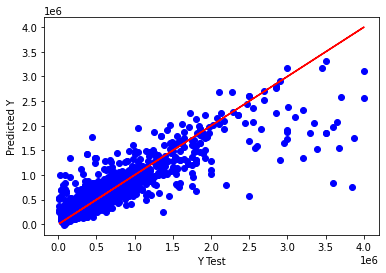

In [132]:
new_model1 = CatBoostRegressor(depth= 8, iterations = 100, learning_rate = 0.1)
new_model1.fit(x_train, y_train)
preds = new_model1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [133]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [134]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [135]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('XGB', 0.8424667717647588),
 ('RandomForest', 0.7949179019446566),
 ('Bagging', 0.7762161601759182),
 ('GradientBoosting', 0.734116661368993),
 ('ExtraTree', 0.7233775207437104),
 ('DecisionTree', 0.5909982204250677),
 ('KNeighbors', 0.5089155317478375),
 ('AdaBoost', 0.38373907347431807),
 ('BayesianRidge', 0.3502038442424747),
 ('Ridge', 0.3501652582578137),
 ('Lasso', 0.350162802733961),
 ('LinearRegression', 0.3501626546848372),
 ('SGD', 0.34979365115350963),
 ('ElasticNet', 0.3222970175035715),
 ('Huber', 0.2647695899098993),
 ('RANSAC', 0.08260287556220287)]

In [136]:
base_model_scores = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

In [137]:
base_model_scores

[('XGB', 0.8424667717647588),
 ('RandomForest', 0.7949179019446566),
 ('Bagging', 0.7762161601759182),
 ('GradientBoosting', 0.734116661368993),
 ('ExtraTree', 0.7233775207437104),
 ('DecisionTree', 0.5909982204250677),
 ('KNeighbors', 0.5089155317478375),
 ('AdaBoost', 0.38373907347431807),
 ('BayesianRidge', 0.3502038442424747),
 ('Ridge', 0.3501652582578137),
 ('Lasso', 0.350162802733961),
 ('LinearRegression', 0.3501626546848372),
 ('SGD', 0.34979365115350963),
 ('ElasticNet', 0.3222970175035715),
 ('Huber', 0.2647695899098993),
 ('RANSAC', 0.08260287556220287)]

### Feature Selection

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,  f_classif

In [140]:
#Selecting 7 features out of 8
# define feature selection
bst_fs = SelectKBest(score_func=f_regression, k=7)
# apply feature selection
bst_fs.fit(x_train, y_train)
# get the column indices
cols  = bst_fs.get_support(indices=True)
best_df = x_train.iloc[:,cols]

best_df

,Year,Owner,Kms,Make,Model,Transmission,Fuel
4565,2004,2,100000.0,73,379,0,3
6291,2012,1,85000.0,147,500,1,1
4891,2005,3,64000.0,162,1597,1,4
4845,2019,1,65000.0,45,1662,0,1
1609,2017,1,73500.0,168,136,1,4
...,...,...,...,...,...,...,...
1673,2012,2,72000.0,124,695,0,1
5523,2008,2,80000.0,98,585,1,4
3287,2005,2,75000.0,161,457,1,4
4261,2018,1,85000.0,99,153,1,1


### Model Training with Feature Selection

In [142]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_df, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('XGB', 0.849262991659535),
 ('RandomForest', 0.7997260800872877),
 ('Bagging', 0.7835757928149858),
 ('GradientBoosting', 0.7300818306326006),
 ('ExtraTree', 0.7185206656951154),
 ('DecisionTree', 0.6627224674221378),
 ('KNeighbors', 0.5456486678739007),
 ('BayesianRidge', 0.35023447737418684),
 ('Ridge', 0.35020159541006624),
 ('Lasso', 0.3501992085305186),
 ('LinearRegression', 0.350199069913208),
 ('SGD', 0.3497131339337049),
 ('ElasticNet', 0.3223121412271344),
 ('AdaBoost', 0.2872911020457127),
 ('Huber', 0.2648569717502475),
 ('RANSAC', 0.07812810827011604)]

In [143]:
model_fs = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

### Feature Extraction

In [144]:
#PCA

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_df = StandardScaler().fit_transform(x_train)
pca = PCA(n_components=0.99, svd_solver='full')
pca_df = pca.fit_transform(scaled_df)

pca_df.shape

(5313, 8)

### Model training with Feature Extraction

In [146]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], pca_df, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('ExtraTree', 0.5879755665783052),
 ('RandomForest', 0.5552465764365048),
 ('XGB', 0.527519633941352),
 ('KNeighbors', 0.5016577937919695),
 ('Bagging', 0.49949617075948327),
 ('GradientBoosting', 0.48182888661437456),
 ('BayesianRidge', 0.35020043398830386),
 ('Ridge', 0.3501654713184062),
 ('Lasso', 0.35016272284814),
 ('LinearRegression', 0.3501626546848372),
 ('SGD', 0.34855478257073863),
 ('ElasticNet', 0.3139694795721067),
 ('Huber', 0.264555989435908),
 ('DecisionTree', 0.19767011293968223),
 ('AdaBoost', 0.19442699253775547),
 ('RANSAC', 0.08051001481974362)]

In [147]:
model_fe = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

In [148]:
# Top 2 models with scores
base_model_scores[0]

('XGB', 0.8424667717647588)

In [149]:
base_model_scores[1]

('RandomForest', 0.7949179019446566)

In [156]:
base_model_scores[2]

('Bagging', 0.7762161601759182)

### Hyperparameter Tuning

In [150]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

gs = GridSearchCV(model, param_grid = {'learning_rate': [0.01,0.02], 'subsample' : [0.9, 0.5],
                                 'n_estimators' : [100,500], 'max_depth' : [4,6]}, cv=5, n_jobs=1)

gs.fit(x_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}
0.836042852924626


MAE: 110295.79680248236
MSE: 46749990743.73161
RMSE: 216217.46169940024
Variance: 0.8364849217858419
R2 Score: 0.8364084859412866


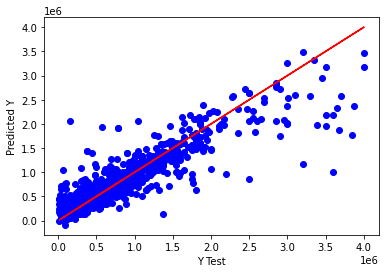

In [154]:
new_model = GradientBoostingRegressor(learning_rate= 0.02, max_depth= 6, n_estimators= 500, subsample= 0.5)
new_model.fit(x_train, y_train)
preds = new_model.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [152]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

rfr = GridSearchCV(model, param_grid = { "n_estimators" : [10,20,30], "max_features" : ["auto", "sqrt", "log2"],
                                       "min_samples_split" : [2,4,8], "bootstrap": [True, False], }, cv=5, n_jobs=1)

rfr.fit(x_train, y_train)

print(rfr.best_params_)
print(rfr.best_score_)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
0.778464899607292


MAE: 114884.37393573414
MSE: 58589792642.581154
RMSE: 242053.28471760335
Variance: 0.7950570302229254
R2 Score: 0.7949776516678545


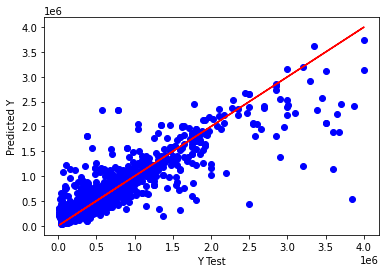

In [155]:
new_model1 = RandomForestRegressor(bootstrap= True, max_features= 'auto', min_samples_split= 2, n_estimators= 20)
new_model1.fit(x_train, y_train)
preds = new_model1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [157]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8164466664023837
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


[17:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE: 98645.88901562999
MSE: 40367167469.96112
RMSE: 200915.82185074704
Variance: 0.8588149721386243
R2 Score: 0.8587437999534142


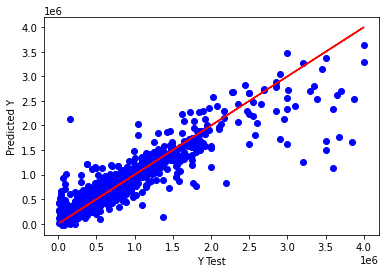

In [163]:
new_model_XGB = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.05, 
                             max_depth = 6, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
new_model_XGB.fit(x_train, y_train)
preds = new_model_XGB.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [164]:
import joblib
joblib.dump(new_model_XGB, "Car Price Model.pkl") 

['Car Price Model.pkl']

In [159]:
#End of notebook